# Bank Marketing Campaign

by :

1. Cindy Fransisca
2. Muhammad Zulfikar Muslim

## 1. Business Understanding

**Context**  

Umumnya pendapatan utama suatu bank berasal dari bunga pinjaman yang diberikan kepada nasabah. Pinjaman yang diberikan kepada nasabah itu sendiri umumnya berasal dari deposito nasabah lain. Semakin besar jumlah deposito yang dimiliki sebuah bank, maka semakin besar jumlah pendapatan yang kemungkinan bisa dimiliki oleh sebuah bank. 

Dengan semakin tingginya persaingan antara bank dalam menawarkan produk depositonya, maka salah satu cara pemasaran yang dilakukan adalah dengan melakukan direct marketing. Biasanya nasabah terpilih dihubungi secara langsung melalui: kontak pribadi, telepon seluler, surat, dan email atau kontak lainnya untuk mengiklankan produk/jasa baru atau memberikan penawaran. Akan tetapi, tidak semua nasabah tertarik untuk melakukan deposito sehingga terkadang biaya marketing yang dikeluarkan menjadi sia-sia. 

Tim marketing ingin mengetahui nasabah mana yang berpotensi melakukan deposito sehingga dapat memaksimalkan pendapatan dari deposito dan meminimalisir biaya yang diperlukan untuk marketing.


**Problem Statement :**

Bank XYZ merupakan salah satu Bank terkemuka di Portugal yang saat ini tengah mengalami penurunan pendapatan dan mereka ingin mengetahui tindakan apa yang harus diambil. Setelah dilakukan penyelidikan internal, Bank XYZ menemukan bahwa akar masalahnya adalah persentase nasabah yang melakukan deposito di bank masih tergolong rendah. Oleh karenanya Bank XYZ akan menawarkan produk term deposit kepada nasabahnya.

Akan tetapi jika kita menghubungi semua nasabah untuk menawarkan produk deposito tersebut, maka sistem kerja menjadi tidak efisien dan biaya yang diperlukan tinggi. Adapun jika kita hanya menghubungi sebagian nasabah, maka kita bisa kehilangan nasabah yang sebenarnya berpotensi melakukan deposito. Selain itu besarnya sumber data nasabah yang dimiliki juga tidak memungkinkan bagi seorang analis untuk menghasilkan informasi dan melakukan adaptasi terhadap perubahan data yang dinamis dengan cepat.

Oleh karena itu, tim marketing Bank XYZ memerlukan kemampuan untuk memprediksi nasabah mana yang akan tertarik memesan deposito sehingga dapat meminimalisir biaya marketing sekaligus memaksimalkan pendapatan dari deposito.


**Goals :**

Maka berdasarkan permasalahan tersebut, tim marketing Bank XYZ ingin mengetahui karakteristik dari pelanggan yang melakukan deposito, sehingga mereka dapat membuat program-program yang lebih tepat sasaran untuk meningkatkan jumlah pelanggan yang melakukan deposito.

Tim marketing juga ingin memiliki kemampuan untuk memprediksi nasabah mana yang akan melakukan deposito, sehingga dapat memfokuskan upaya-upaya pemasaran kepada nasabah tersebut.

Hal ini tidak hanya memungkinkan Bank XYZ untuk memperoleh nasabah deposit secara lebih efektif tetapi juga meningkatkan kepuasan nasabah dengan mengurangi iklan yang tidak diinginkan oleh nasabah tertentu.


**Analytic Approach :**

Jadi kita akan menganalisis data untuk menemukan pola yang membedakan nasabah yang melakukan deposito atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu tim marketing untuk dapat memprediksi seorang nasabah akan melakukan deposito atau tidak.

**Evaluation Metric**

Karena fokus utama kita adalah nasabah yang melakukan deposito, maka target yang kita tetapkan adalah sebagai berikut:

Target :
- 0 : no (tidak melakukan deposito)
- 1 : yes (melakukan deposito)

Type 1 error : False Positive (nasabah yang aktualnya tidak deposit tetapi diprediksi deposit)\
Konsekuensi: Kerugian dari biaya telemarketing, ketidaknyamanan nasabah

Type 2 error : False Negative (nasabah yang aktualnya deposit tetapi diprediksi tidak akan deposit)\
Konsekuensi: Kehilangan potensi pendapatan dari nasabah potensial

Untuk memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba hitung dampak biaya berdasarkan asumsi berikut :
- Gaji telemarketing di Portugal sekitar 2450 Euro per bulan.
- Hari kerja dalam sebulan : 22 hari
- Jam kerja dalam sehari : 8 jam
- Upah per jam = 2450 Euro/bulan x (22 hari/ bulan x 8 jam/hari) = 13.92 Euro/jam
- Rata-rata durasi telemarketing per orang sekitar 372 detik.
- Rata-rata jumlah deposit per nasabah sekitar 2500 Euro per orang. ([sumber](https://www.ceicdata.com/en/portugal/banking-indicators/pt-deposit-accounts-per-1000-adults-commercial-banks))
- Interest Rate : 2% ([sumber](https://take-profit.org/en/statistics/interest-rate/portugal/))
- Lending Rate : 3.27% ([sumber](https://take-profit.org/en/statistics/interest-rate/portugal/))

Berdasarkan asumsi di atas maka kita dapat coba kuantifikasi konsekuensinya sebagai berikut :
- Hilangnya biaya dan waktu untuk telemarketing --> maka kita menyia-nyiakan biaya sebesar = 13.92 x 372/3600 = 1.44 Euro per orang
- Hilangnya potensi pendapatan --> maka kita kehilangan potensi pendapatan sebesar = (3.27% - 2%) * 2500 Euro = 31.75 Euro per orang

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi jumlah False Negative (nasabah yang aktualnya akan deposit tetapi diprediksi tidak deposit). Selain itu, sebisa mugkin kita juga akan meminimalisir telemarketing yang tidak tepat sasaran. Metric utama yang akan kita gunakan adalah recall karena False Negative memiliki kerugian yang jauh lebih besar

## 2. Data Understanding


- Sumber dataset : https://archive.ics.uci.edu/ml/datasets/bank+marketing
- Periode pembuatan data : Mei 2008 - November 2010
- Dataset menggambarkan hasil marketing campaign dari sebuah bank di Portugal kepada 41.000+ nasabah. Metode marketing yang dilakukan berupa kontak langsung melalui telepon untuk menawarkan program term deposit.
- Setiap baris merepresentasikan informasi dari seorang nasabah dan keadaan sosial-ekonomi dari marketing campaign sebelumnya.
- Terdapat missing values dalam dataset yang diberi label 'unknown'



### Attribute Information


**Informasi demografi nasabah**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Age |Integer | age of client |
|Job |Text | type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown") |
|Marital |Text | marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed) |
|Education |Text | level of education (categorical: "basic.4y" ,"basic.6y" ,"basic.9y","high.school" ,"illiterate" "professional.course", "university.degree", "unknown") |
|Default |Text | has credit in default? (categorical: "no","yes","unknown") |
|Housing |Text | has housing loan? (categorical: "no","yes","unknown") |
|Loan |Text | has personal loan? (categorical: "no","yes","unknown") |

**Informasi terkait campaign saat ini**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Contact |Text | contact communication type (categorical: "cellular","telephone") |
|Month |Text | last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec") |
|Day_of_week |Text | last contact day of the week (categorical: "mon","tue","wed","thu","fri") |
|Duration |Integer | last contact duration, in seconds. Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no") |
|Campaign |Integer | number of contacts performed during this campaign and for this client (numeric, includes last contact) |

**Informasi terkait campaign sebelumnya**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Pdays |Integer | pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) |
|Previous |Integer | previous: number of contacts performed before this campaign and for this client |
|Poutcome |Text | poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success") |

**Informasi terkait keadaan sosial-ekonomi**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Emp.var.rate |Float | employment variation rate - quarterly indicator |
|Cons.price.idx |Float | consumer price index - monthly indicator |
|Cons.conf.idx |Float | consumer confidence index - monthly indicator |
|Euribor3m |Float | euribor 3 month rate - daily indicator |
|Nr.employed |Float | number of employees - quarterly indicator |

**Target**

| Attribute | Data Type | Description |
| --- | --- | --- | 
|Y |Text | has the client subscribed a term deposit? (binary: "yes","no") |

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time

# data analysis
from matplotlib.lines import Line2D
from scipy.stats import chi2_contingency, normaltest

# traintest split
from sklearn.model_selection import train_test_split

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.pipeline import Pipeline

#feature selection
from sklearn.feature_selection import SelectPercentile, SelectFromModel

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Evaluation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, make_scorer
from sklearn.metrics import  classification_report, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
pd.set_option('display.max_colwidth', None)

### Eksplorasi Data

In [3]:
raw_data = pd.read_csv('bank-additional-full.csv', sep = ';')
df = raw_data.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


### Features

In [7]:
categorical_cols = list(df.select_dtypes(['object','category']).columns)
numerical_cols = list(set(df.columns)-set(categorical_cols))

print(f'Number of categorical features: {len(categorical_cols)-1}')
print(f'Categorical features: {[cols for cols in categorical_cols if cols != "y"]}')
print(f'\nNumber of numerical features: {len(numerical_cols)}')
print(f'Numerical features: {numerical_cols}')

Number of categorical features: 10
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Number of numerical features: 10
Numerical features: ['duration', 'cons.conf.idx', 'emp.var.rate', 'pdays', 'previous', 'cons.price.idx', 'campaign', 'age', 'nr.employed', 'euribor3m']


### Target

In [8]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
df['y'].value_counts()/len(df)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

Target tidak seimbang karena proporsi kelas minoritas hanya sebesar 11.27% dan tergolong dalam moderate imbalance  karena berada dalam rentang 1-20% dari dataset. ([Sumber](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data))

### Missing Values

In [10]:
def missing_values(df):
    missing_values = df.isnull().sum().to_frame().reset_index()
    missing_values = missing_values.rename(columns = {'index': 'column', 0: 'number of missing values'})
    missing_values['% missing values'] = (missing_values['number of missing values']/df.shape[0]*100).round(2)
    
    return missing_values

missing_values(df)

,column,number of missing values,% missing values
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,housing,0,0.0
6,loan,0,0.0
7,contact,0,0.0
8,month,0,0.0
9,day_of_week,0,0.0


In [11]:
list_column = []
list_unknown = []
list_percent_unknown = []

for i in categorical_cols:
    unknown = df[i].str.contains('unknown').sum()
    list_unknown.append(unknown)

    percent_unknown = (unknown / len(df) * 100).round(2)
    list_percent_unknown.append(percent_unknown)

    list_column.append(i)

pd.DataFrame({
    'column' : list_column,
    'Number of unknown' : list_unknown,
    '% unknown' : list_percent_unknown
}
)
    

,column,Number of unknown,% unknown
0,job,330,0.80
1,marital,80,0.19
2,education,1731,4.20
3,default,8597,20.87
4,housing,990,2.40
5,loan,990,2.40
6,contact,0,0.00
7,month,0,0.00
8,day_of_week,0,0.00
9,poutcome,0,0.00


Berdasarkan tabel-tabel di atas, data kita tidak memiliki missing value. Akan tetapi, ada beberapa kolom yang memiliki label 'unknown'. Persentase jumlah unknown cukup rendah (<5%) pada semua kolom, kecuali kolom `housing` sebesar 20.87% .

### Duplicates

In [12]:
duplicates = df.duplicated().sum()

print('Number of duplicates =', duplicates)

Number of duplicates = 12


In [13]:
percent_duplicates = df.duplicated().sum()/len(df)*100

print('Percent of duplicates =', '{:.2f}%'.format(percent_duplicates))

Percent of duplicates = 0.03%


Data kita memiliki duplikat dalam jumlah yang sangat kecil, yaitu 0.03%. Akan tetapi, data kita tidak memiliki kolom `Client ID` untuk menentukan apakah data kita memiliki duplikat atau ada beberapa nasabah yang kebetulan memiliki informasi yang sama.

### Outliers

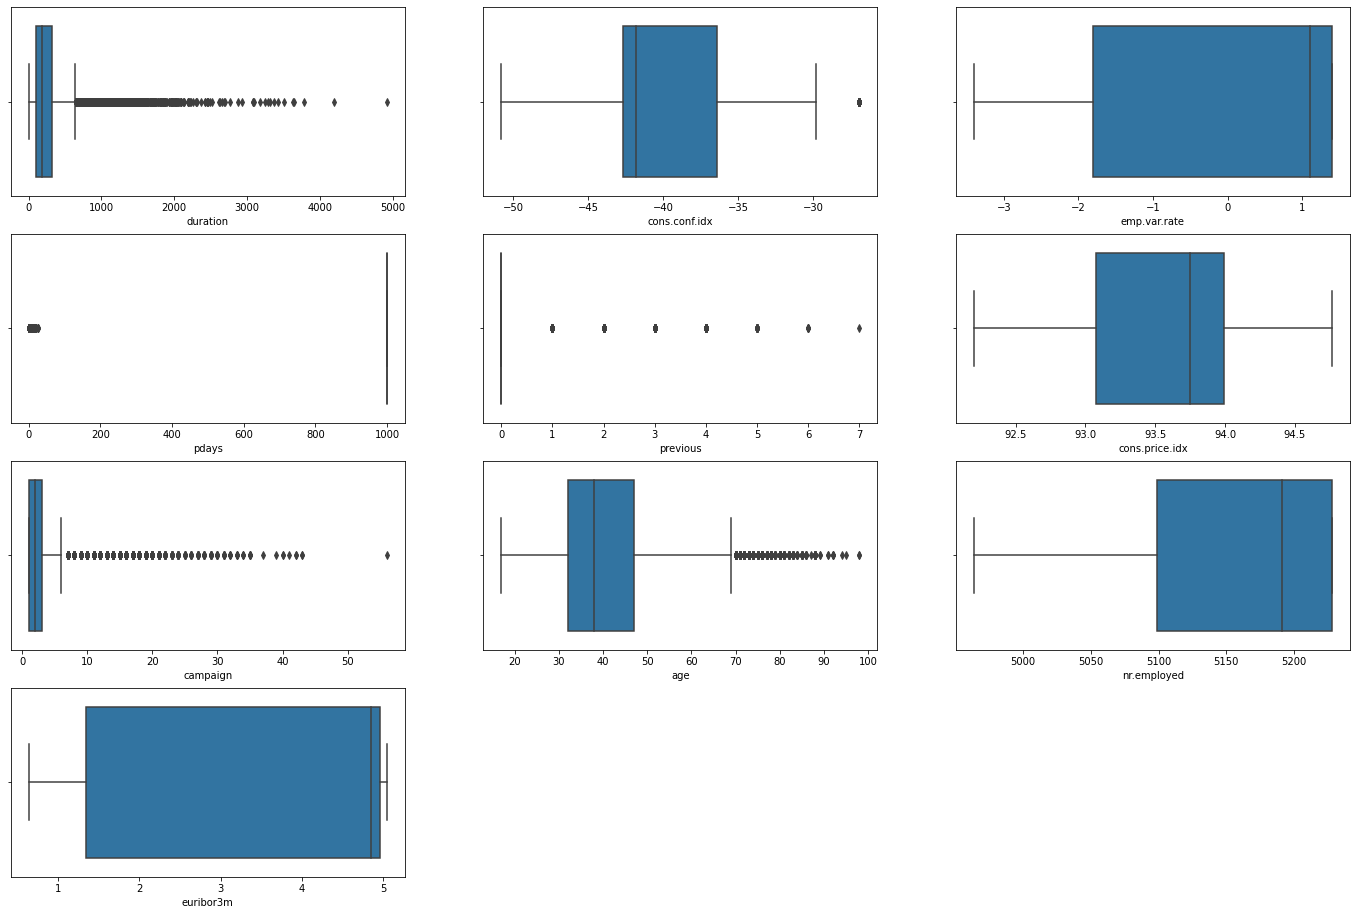

In [14]:
fig, axes = plt.subplots(4, 3, figsize=(24,16))

for i, j in zip(numerical_cols, axes.flatten()):
    sns.boxplot(data=df, x= i, ax= j)

axes[3][1].axis('off')
axes[3][2].axis('off')

plt.show()

Berdasarkan gambar di atas, kita dapat melihat bahwa ada beberapa features yang memiliki outliers, yaitu `age`, `cons.conf.idx`, `previous`, `duration`, `pdays`, dan `campaign`.

## 3. Exploratory Data Analysis

In [15]:
def age_group(x):
    if x < 13:
        age_group = 'child'
    elif 13 <= x < 21:
        age_group = 'teenage'
    elif 21 <= x < 31:
        age_group = 'young adult'
    elif 31 <= x < 45:
        age_group = 'adult'
    elif 45 <= x < 60:
        age_group = 'middle-aged'
    else:
        age_group = 'senior'
        
    return age_group

df.insert(1, 'age group',value ='')

df['age group'] = df['age'].apply(age_group)

In [16]:
categorical_cols.append('age group')

### Data Distribution

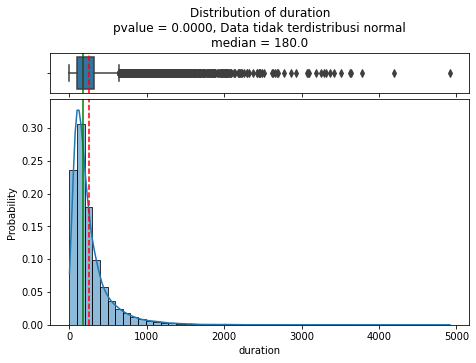

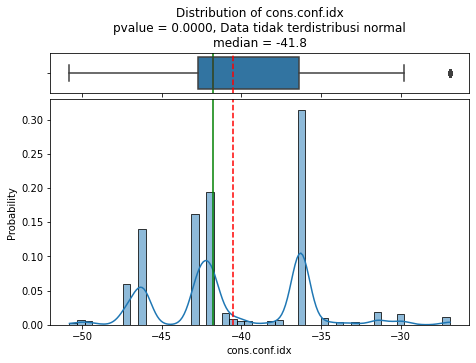

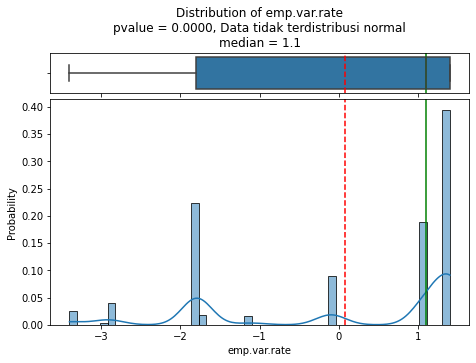

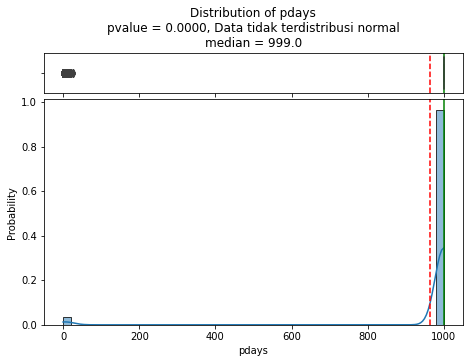

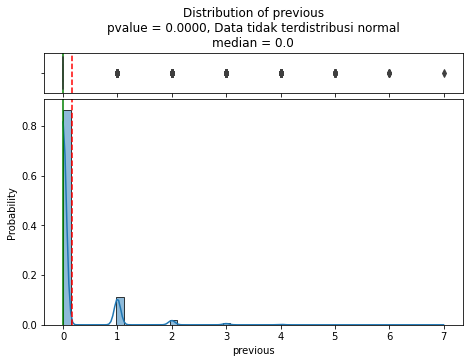

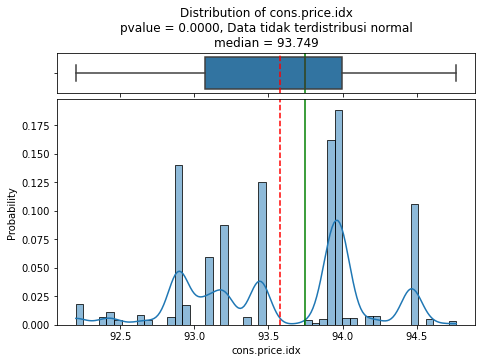

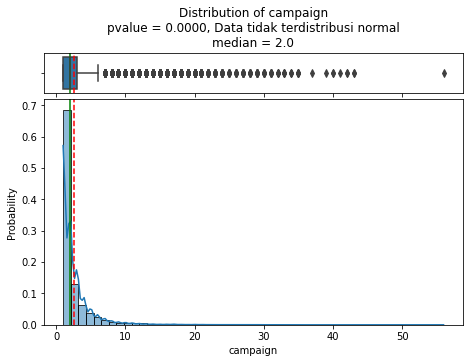

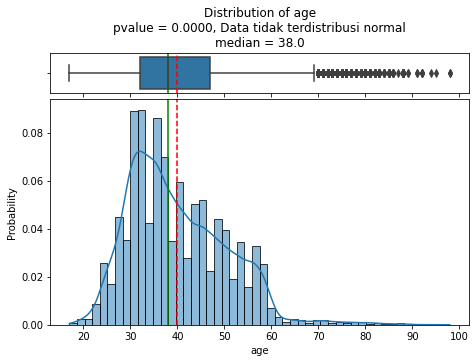

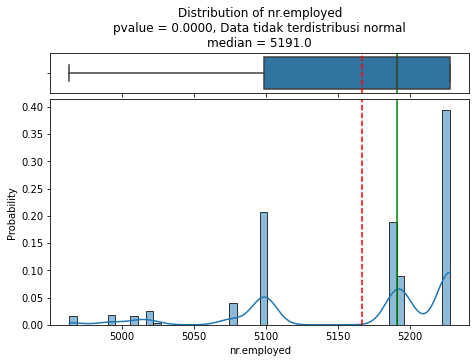

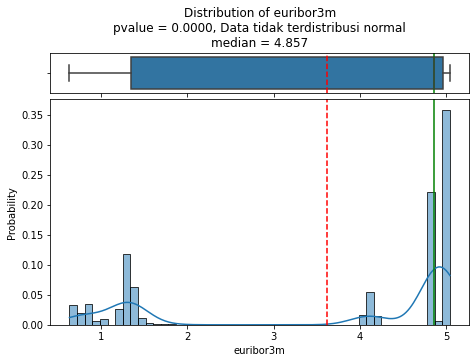

In [17]:
for i, j in enumerate(numerical_cols) :

     fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

     pvalue=normaltest(df[j])[1]
     if pvalue > 0.05 :
          text = (f'pvalue = {pvalue:.4f}, Data terdistribusi normal')
     else :
         text = (f'pvalue = {pvalue:.4f}, Data tidak terdistribusi normal')

     ax1.set_title(f"Distribution of {j}\n{text}\nmedian = {df[j].median()}", color = "black")
     sns.boxplot(x = df[j], ax = ax1)
     ax1.axvline(df[j].mean(), color='r', linestyle='--')
     ax1.axvline(df[j].median(), color='g', linestyle='-')
     ax1.set(xlabel = "")
     sns.histplot(data = df[j], ax = ax2, stat = "probability", kde=True, bins=50)
     ax2.axvline(df[j].mean(), color='r', linestyle='--')
     ax2.axvline(df[j].median(), color='g', linestyle='-')
     plt.show()


Berdasarkan grafik di atas, informasi numerik yang bisa kita dapat diantaranya:

- Seluruh data numerik tidak terdistribusi normal
- euribor3m - Distribusi untuk Euribor 3 month terbagi menjadi 2 bagian, satu di bawah 2 and satunya di atas 3.5. Mayoritas kontak terjadi pada saat euribor di atas 3.5
- nr.employed - Distribusi untuk jumlah pegawai terbagi menjadi 2 bagian, satu di atas 5150 dan satunya di bawah 5150.
- duration - Median durasi sekitar 180 detik. Mayotitas durasi berada pada rentang 0 hingga 800 detik.
- age - Mayoritas nasabah berada dalam rentang usia antara 20 dan 60 tahun.
- cons.price.idx - Harga barang-barang konsumsi rumah tangga pada periode tersebut berkurang antara 5 - 8%.
- previous - Mayoritas nasabah tidak dihubungi pada program sebelumnya.
- campaign - Mayoritas nasabah dikontak antara 1 - 3 kali selama masa campaign.

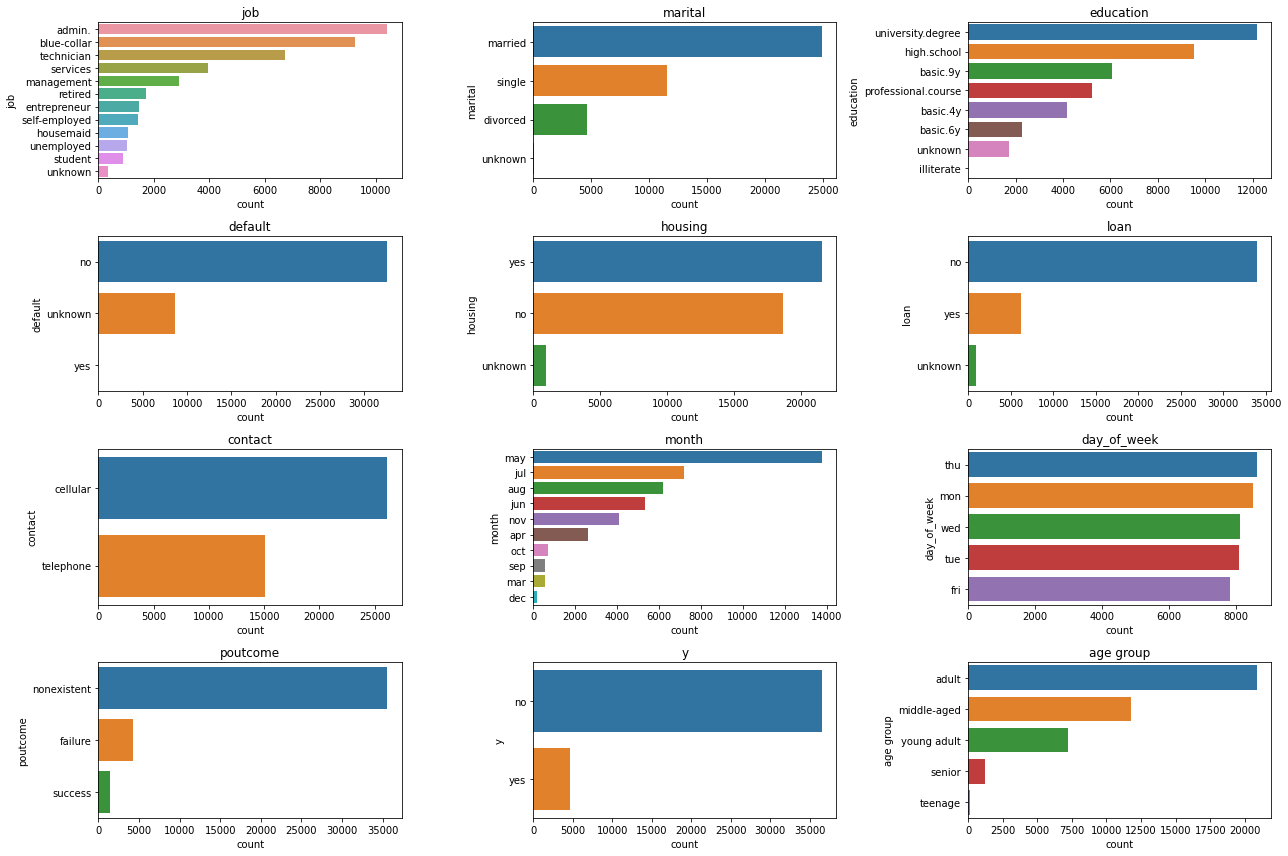

In [18]:
fig, axes = plt.subplots(4, 3, figsize=(18, 12)) 
for i, j in zip(categorical_cols, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()

plt.show()

Secara umum, karakteristik nasabah berdasarkan grafik di atas dapat dirangkum sebagai berikut:

- job - Mayoritas nasabah memiliki pekerjaan sebagai admin, blue-collar, technician dan services.
- marital - Mayoritas nasabah berstatus menikah dan lajang.
- education - Mayoritas nasabah merupakan lulusan universitas dan SMA. 
- contact - Mayoritas nasabah dikontak menggunakan cellular 
- month - Mayoritas nasabah terakhir dihubungi pada bulan mei.
- poutcome - Hasil dari campain sebelumnya yang diketahui hanya sekitar 13.6% nasabah saja dimana 3.3%-nya adalah success. 
- age group - Mayoritas nasabah berada dalam kelompok umur 'adult' dan 'middle-aged' (31 - 60 tahun)

### Data Correlation

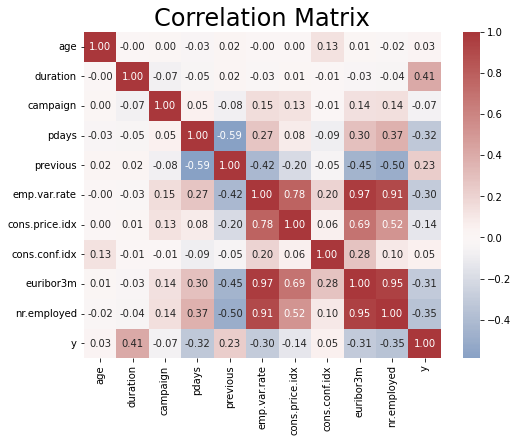

In [19]:
df_corr = df.copy()
df_corr['y'] = df_corr['y'].apply(lambda x: 1 if x =='yes' else 0)

plt.figure(figsize=(8,6))
plt.title('Correlation Matrix', fontsize=24)
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap= 'vlag', center=0);

Dari correlation matrix tersebut, kita dapat melihat bahwa beberapa feature sosio-ekonomi memiliki korelasi positif yang kuat dengan satu sama lain. Feature tersebut antara lain `emp.var.rate`, `cons.price.idx`, `euribor3m`, dan `nr.employed`. 

Kita juga dapat melihat bahwa target memiliki korelasi positif moderate dengan feature `duration`. Hal ini kemungkinan disebabkan semua nasabah yang tidak ditelepon (duration=0) diasumsikan tidak melakukan deposito (target=no) sehingga adanya korelasi.

Target memiliki beberapa korelasi negatif lemah dengan feature `pdays`, `emp.var.rate`, `euribor3m`, dan `nr.employed`. Kemudian, target juga memiliki korelasi positif lemah dengan feature `previous`.

### Karakteristik nasabah yang tertarik dengan deposito

Untuk menentukan karkteristik dari nasabah yang tertarik dengan deposito, kita akan mencoba menjawab beberapa pertanyaan berikut:
- Apa pekerjaan yang memiliki persentase nasabah melakukan deposito paling tinggi?
- Bagaimana cara kontak yang lebih diminati oleh nasabah yang melakukan deposito?
- Kapan waktu terbaik untuk melakukan kontak terhadap nasabah yang tertarik dengan deposito?
- Berapa lama durasi kontak yang optimal agar nasabah melakukan deposito?
- Apakah campaign sebelumnya berpengaruh terhadap campaign saat ini?


#### Apa pekerjaan yang memiliki persentase nasabah melakukan deposito paling tinggi?

In [20]:
df_job = df.groupby(['job', 'y']).size().unstack().reset_index()
df_job['total'] = df_job['yes']+df_job['no']
df_job['% subscribed'] = (df_job['yes']/df_job['total']*100).round(2)
df_job = df_job.sort_values(by='% subscribed', ascending=False)
df_job

y,job,no,yes,total,% subscribed
8,student,600,275,875,31.43
5,retired,1286,434,1720,25.23
10,unemployed,870,144,1014,14.20
0,admin.,9070,1352,10422,12.97
4,management,2596,328,2924,11.22
11,unknown,293,37,330,11.21
9,technician,6013,730,6743,10.83
6,self-employed,1272,149,1421,10.49
3,housemaid,954,106,1060,10.00
2,entrepreneur,1332,124,1456,8.52


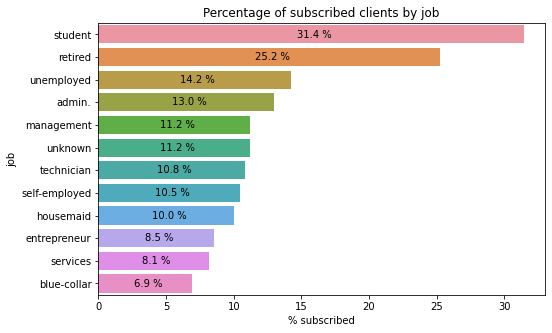

In [21]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_job, y='job', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed clients by job')
plt.show()

**Insight**

Pekerjaan yang memiliki persentase subscribe deposito paling tinggi adalah **student** sebesar **31.4%**, kemudian diikuti oleh **retired** sebesar **25.2%**. Hal ini menandakan kita dapat lebih memfokuskan upaya marketing kita kepada dua kategori pekerjaan ini karena memiliki persentase subscribe 2-4x lebih besar dibandingkan pekerjaan lain.

In [22]:
df_student = df[df['job']=='student']
df_student.head()

,age,age group,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
205,35,adult,student,single,university.degree,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
206,35,adult,student,single,university.degree,unknown,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
209,35,adult,student,single,university.degree,unknown,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
210,36,adult,student,single,basic.9y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
267,31,adult,student,single,university.degree,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
df_student_marital = df_student.groupby(['marital', 'y']).size().unstack().reset_index()
df_student_marital = df_student_marital.fillna(0)
df_student_marital['total'] = df_student_marital['yes']+df_student_marital['no']
df_student_marital['% subscribed'] = (df_student_marital['yes']/df_student_marital['total']*100).round(2)
df_student_marital = df_student_marital.sort_values(by='% subscribed', ascending=False)
df_student_marital

y,marital,no,yes,total,% subscribed
0,divorced,6.0,3.0,9.0,33.33
2,single,560.0,264.0,824.0,32.04
1,married,33.0,8.0,41.0,19.51
3,unknown,1.0,0.0,1.0,0.00


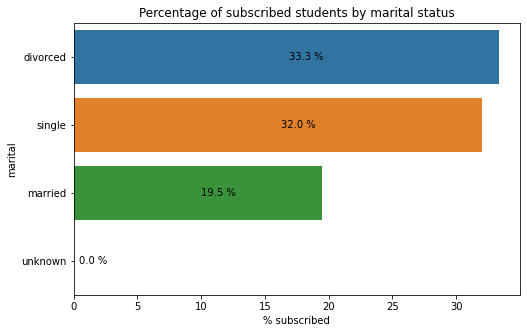

In [24]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_student_marital, y='marital', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=20, label_type='center')

plt.title('Percentage of subscribed students by marital status')
plt.show()

**Insight**

Nasabah dengan pekerjaan **student** memiliki kemungkinan deposito lebih tinggi jika status pernikahannya **divorced** atau **single**, yaitu **33.3%** dan **32.0%**. Hal ini dikarenakan nasabah dengan status single atau divorced memiliki lebih sedikit tanggungan sehingga dapat menginvestasikan tabungan yang dimiliki.

In [25]:
df_student_education = df_student.groupby(['education', 'y']).size().unstack().reset_index()
df_student_education['total'] = df_student_education['yes']+df_student_education['no']
df_student_education['% subscribed'] = (df_student_education['yes']/df_student_education['total']*100).round(2)
df_student_education = df_student_education.sort_values(by='% subscribed', ascending=False)
df_student_education

y,education,no,yes,total,% subscribed
1,basic.6y,6,7,13,53.85
4,professional.course,26,17,43,39.53
2,basic.9y,64,35,99,35.35
6,unknown,108,59,167,35.33
3,high.school,243,114,357,31.93
0,basic.4y,18,8,26,30.77
5,university.degree,135,35,170,20.59


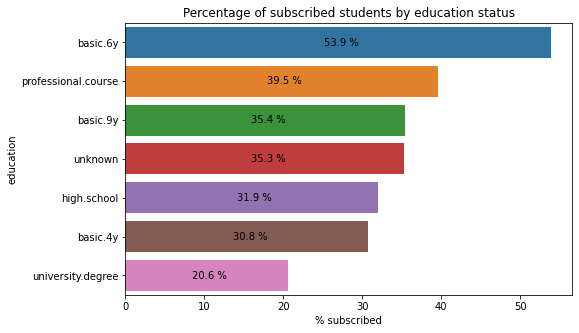

In [26]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_student_education, y='education', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed students by education status')
plt.show()

**Insight**

Berdasarkan tingkat pendidikkan, nasabah dengan pekerjaan **student** memiliki kemungkinan deposito lebih tinggi jika tingkat pendidikannya **basic.6y**, yaitu sebesar **53.9%**. Hal ini mungkin disebabkan nasabah ingin menabung untuk pendidikannya di masa depan. Oleh karena itu, sebaiknya tim marketing menargetkan program deposito khususnya untuk murid sekolah dalam tingkat pendidikan ini. Akan tetapi, perlu kita ingat bahwa student dengan tingkat pendidikan basic.6y dalam dataset kita hanya berjumlah 13 orang sehingga kita tidak bisa memastikan seberapa akurat data tersebut.

In [27]:
df_student_age = df_student.groupby(['age group', 'y']).size().unstack().reset_index()
df_student_age = df_student_age.fillna(0)
df_student_age['total'] = df_student_age['yes']+df_student_age['no']
df_student_age['% subscribed'] = (df_student_age['yes']/df_student_age['total']*100).round(2)
df_student_age = df_student_age.sort_values(by='% subscribed', ascending=False)
df_student_age

y,age group,no,yes,total,% subscribed
1,middle-aged,2,2,4,50.00
2,teenage,66,55,121,45.45
3,young adult,426,189,615,30.73
0,adult,106,29,135,21.48


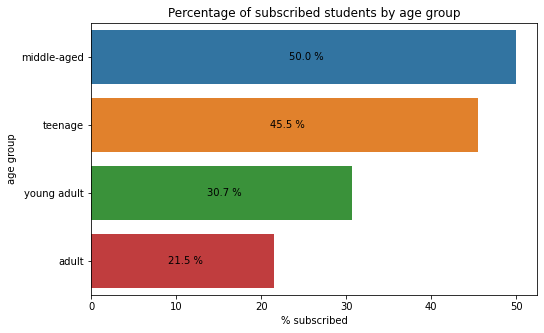

In [28]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_student_age, y='age group', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed students by age group')
plt.show()

**Insight**

Berdasarkan gambar di atas, nasabah student yang paling banyak melakukan deposito berasal dari kategori usia middle-aged. Hal ini kemungkinan merupakan outliers dari nasabah student karena jumlah student dengan kategori usia middle-aged hanya 4 orang. Maka lebih masuk akal jika kita mengasumsikan bahwa nasabah **student** yang paling banyak melakukan deposito berasal dari kategori usia **teenage** (13-20 tahun), yaitu sebesar **45.5%**. Hal ini sesuai dengan analisis kita sebelumnya bahwa nasabah dengan pekerjaan student yang paling tertarik melakukan deposito adalah nasabah yang masih berada dalam usia sekolah. Oleh karena itu, tim marketing harus memfokuskan upaya kepada nasabah student yang masih berada dalam usia sekolah atau menawarkan produk-produk khusus pelajar.

In [29]:
df_retired = df[df['job']=='retired']
df_retired.head()

,age,age group,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
15,54,middle-aged,retired,married,basic.9y,unknown,yes,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
22,55,middle-aged,retired,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
110,60,senior,retired,divorced,university.degree,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
128,56,middle-aged,retired,married,basic.4y,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
187,54,middle-aged,retired,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df_retired_marital = df_retired.groupby(['marital', 'y']).size().unstack().reset_index()
df_retired_marital = df_retired_marital.fillna(0)
df_retired_marital['total'] = df_retired_marital['yes']+df_retired_marital['no']
df_retired_marital['% subscribed'] = (df_retired_marital['yes']/df_retired_marital['total']*100).round(2)
df_retired_marital = df_retired_marital.sort_values(by='% subscribed', ascending=False)
df_retired_marital

y,marital,no,yes,total,% subscribed
0,divorced,256,92,348,26.44
1,married,945,329,1274,25.82
3,unknown,4,1,5,20.00
2,single,81,12,93,12.90


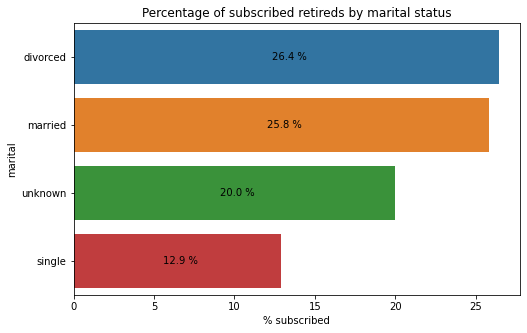

In [31]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_retired_marital, y='marital', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed retireds by marital status')
plt.show()

**Insight**

Berbeda dengan nasabah yang memiliki pekerjaan student, nasabah dengan pekerjaan retired memiliki kemungkinan deposito lebih tinggi jika status pernikahannya **divorced** atau **married**, yaitu **26.4%** dan **25.8%**. Nasabah yang sudah pensiun cenderung menginvestasikan tabungannya karena memiliki tanggungan yang perlu dibiayai meskipun sudah tidak bekerja.

In [32]:
df_retired_education = df_retired.groupby(['education', 'y']).size().unstack().reset_index()
df_retired_education['total'] = df_retired_education['yes']+df_retired_education['no']
df_retired_education['% subscribed'] = (df_retired_education['yes']/df_retired_education['total']*100).round(2)
df_retired_education = df_retired_education.sort_values(by='% subscribed', ascending=False)
df_retired_education

y,education,no,yes,total,% subscribed
4,illiterate,1,2,3,66.67
7,unknown,65,33,98,33.67
0,basic.4y,412,185,597,30.99
5,professional.course,184,57,241,23.65
6,university.degree,219,66,285,23.16
3,high.school,214,62,276,22.46
1,basic.6y,65,10,75,13.33
2,basic.9y,126,19,145,13.10


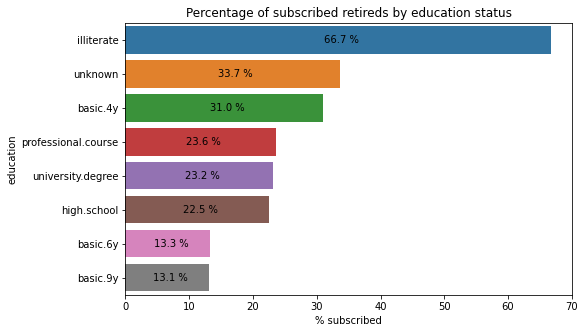

In [33]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_retired_education, y='education', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed retireds by education status')
plt.show()

**Insight**

Berdasarkan tingkat pendidikkan, nasabah dengan pekerjaan **retired** memiliki kemungkinan deposito lebih tinggi jika tingkat pendidikannya **basic.4y**, yaitu sebesar **31.9%**. Hal ini mungkin disebabkan nasabah yang sudah pensiun kebanyakan berusia tua dan akses pendidikan yang ada pada waktu itu hanya mengakomodir pendidikan hingga basic4y. Oleh karena itu, sebaiknya tim marketing menargetkan program deposito khususnya dalam tingkat pendidikan ini. 

In [34]:
df_retired_age = df_retired.groupby(['age group', 'y']).size().unstack().reset_index()
df_retired_age = df_retired_age.fillna(0)
df_retired_age['total'] = df_retired_age['yes']+df_retired_age['no']
df_retired_age['% subscribed'] = (df_retired_age['yes']/df_retired_age['total']*100).round(2)
df_retired_age = df_retired_age.sort_values(by='% subscribed', ascending=False)
df_retired_age

y,age group,no,yes,total,% subscribed
2,senior,451.0,334.0,785.0,42.55
1,middle-aged,780.0,96.0,876.0,10.96
0,adult,50.0,4.0,54.0,7.41
3,young adult,5.0,0.0,5.0,0.00


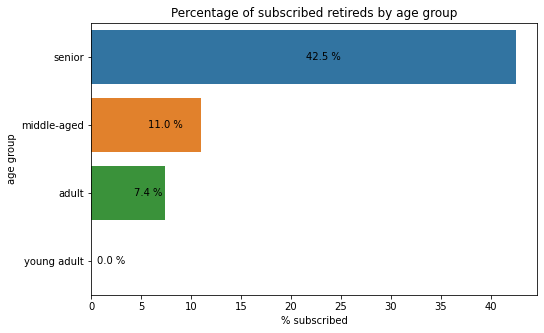

In [35]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_retired_age, y='age group', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=20, label_type='center')

plt.title('Percentage of subscribed retireds by age group')
plt.show()

**Insight**

Dari gambar di atas, kita dapat melihat bahwa nasabah yang sudah pensiun (**retired**) cenderung melakukan deposito jika berada dalam kategori usia **senior** (di atas 60 tahun) dengan persentase sebesar **42.5%**. Pada kategori usia tersebut, kemungkinan nasabah sudah tidak bekerja dan hanya menghabiskan hari tua sehingga tabungan yang dimiliki cenderung diinvestasikan dalam bentuk deposito. Dari hasil analisis ini, tim marketing dapat mencoba melakukan pendekatan kepada nasabah yang sudah pensiun dan masuk dalam kategori usia senior karena memiliki kemungkinan deposito yang jauh lebih tinggi.

In [36]:
df_other = df[(df['job']!='retired') & (df['job']!='student')]
df_other.head()

,age,age group,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,middle-aged,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,middle-aged,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,adult,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,adult,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,middle-aged,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
df_other_marital = df_other.groupby(['marital', 'y']).size().unstack().reset_index()
df_other_marital = df_other_marital.fillna(0)
df_other_marital['total'] = df_other_marital['yes']+df_other_marital['no']
df_other_marital['% subscribed'] = (df_other_marital['yes']/df_other_marital['total']*100).round(2)
df_other_marital = df_other_marital.sort_values(by='% subscribed', ascending=False)
df_other_marital

y,marital,no,yes,total,% subscribed
3,unknown,63,11,74,14.86
2,single,9307,1344,10651,12.62
1,married,21418,2195,23613,9.30
0,divorced,3874,381,4255,8.95


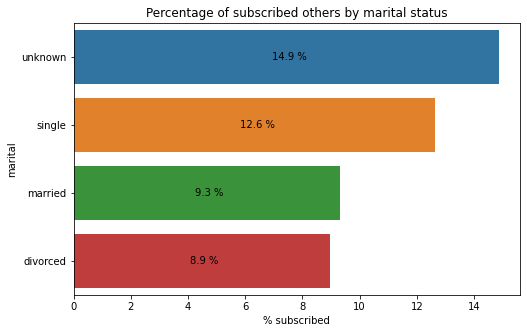

In [38]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_other_marital, y='marital', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed others by marital status')
plt.show()

**Insight**

Berbeda dengan nasabah yang memiliki pekerjaan retired dan student, nasabah dengan pekerjaan selain itu memiliki kemungkinan deposito lebih tinggi jika status pernikahannya **single** atau **married**, yaitu **12.6%** dan **9.3%**. Nasabah yang memiliki pekerjaan cenderung lebih sedikit menginvestasikan tabungannya karena memiliki tanggungan yang perlu dibiayai.

In [39]:
df_other_education = df_other.groupby(['education', 'y']).size().unstack().reset_index()
df_other_education['total'] = df_other_education['yes']+df_other_education['no']
df_other_education['% subscribed'] = (df_other_education['yes']/df_other_education['total']*100).round(2)
df_other_education = df_other_education.sort_values(by='% subscribed', ascending=False)
df_other_education

y,education,no,yes,total,% subscribed
6,university.degree,10144,1569,11713,13.40
4,illiterate,13,2,15,13.33
7,unknown,1307,159,1466,10.85
5,professional.course,4438,521,4959,10.51
3,high.school,8027,855,8882,9.63
1,basic.6y,2033,171,2204,7.76
2,basic.9y,5382,419,5801,7.22
0,basic.4y,3318,235,3553,6.61


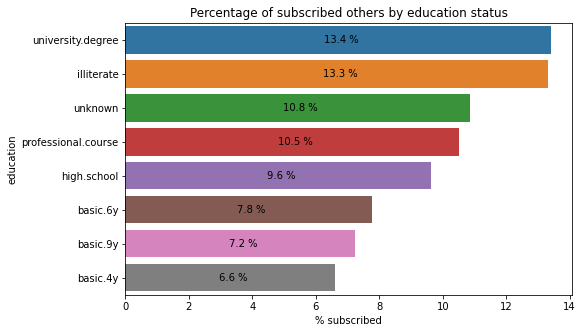

In [40]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_other_education, y='education', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed others by education status')
plt.show()

**Insight**

Nasabah dengan pekerjaan **selain student dan retired** memiliki kemungkinan deposito lebih tinggi jika tingkat pendidikannya **university.degree**, yaitu sebesar **13.4%**. Hal ini mungkin disebabkan nasabah yang lulus kuliah diasumsikan memiliki literasi keuangan yang lebih tinggi. Oleh karena itu, tim marketing dapat menargetkan program deposito untuk nasabah selain student dan retired dalam tingkat pendidikan ini.

In [41]:
df_other_age = df_other.groupby(['age group', 'y']).size().unstack().reset_index()
df_other_age = df_other_age.fillna(0)
df_other_age['total'] = df_other_age['yes']+df_other_age['no']
df_other_age['% subscribed'] = (df_other_age['yes']/df_other_age['total']*100).round(2)
df_other_age = df_other_age.sort_values(by='% subscribed', ascending=False)
df_other_age

y,age group,no,yes,total,% subscribed
2,senior,270,138,408,33.82
4,young adult,5745,878,6623,13.26
3,teenage,17,2,19,10.53
0,adult,18749,1933,20682,9.35
1,middle-aged,9881,980,10861,9.02


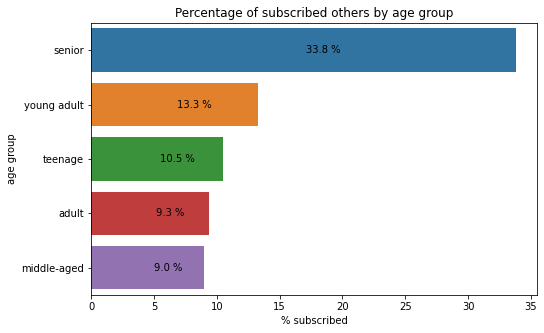

In [42]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_other_age, y='age group', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=20, label_type='center')

plt.title('Percentage of subscribed others by age group')
plt.show()

**Insight**

Berdasarkan gambar di atas, nasabah yang masih bekerja (**bukan retired maupun student**) cenderung melakukan deposito jika berada dalam kategori usia **senior** (di atas 60 tahun) dengan persentase sebesar **33.8%**. Pada kategori usia tersebut, kemungkinan tabungan yang dimiliki cenderung diinvestasikan dalam bentuk deposito untuk mengantisipasi apabila sudah tidak bekerja nantinya. Maka dari itu, untuk nasabah selain student dan retired, tim marketing dapat memfokuskan kepada nasabah yang berada dalam kategori usia senior karena memiliki kemungkinan deposito hingga **3.8x** lebih tinggi dibandingkan kategori lain.

#### Bagaimana cara kontak yang lebih diminati oleh nasabah yang melakukan deposito?


In [43]:
df_contact = df.groupby(['contact', 'y']).size().unstack().reset_index()
df_contact['total'] = df_contact['yes']+df_contact['no']
df_contact['% subscribed'] = (df_contact['yes']/df_contact['total']*100).round(2)
df_contact = df_contact.sort_values(by='% subscribed', ascending=False)

df_contact

y,contact,no,yes,total,% subscribed
0,cellular,22291,3853,26144,14.74
1,telephone,14257,787,15044,5.23


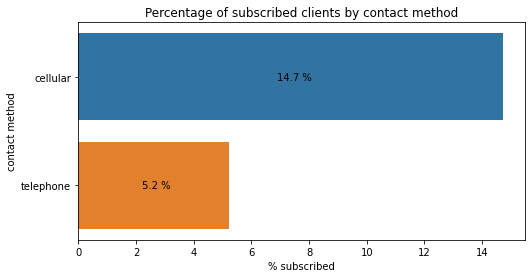

In [44]:
plt.figure(figsize= (8,4))

fig = sns.barplot(data=df_contact, y='contact', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.ylabel('contact method')
plt.title('Percentage of subscribed clients by contact method')
plt.show()

**Insight**

Berdasarkan gambar di atas, nasabah yang dikontak menggunakan **cellular** memiliki kemungkinan deposito **2.83x** lebih tinggi dibandingkan nasabah yang dikontak menggunakan telephone. 

In [45]:
df_age_contact = df.groupby(['age group', 'contact', 'y']).size().unstack().reset_index()
df_age_contact = df_age_contact.fillna(0)
df_age_contact['total'] = df_age_contact['yes']+df_age_contact['no']
df_age_contact['% subscribed'] = (df_age_contact['yes']/df_age_contact['total']*100).round(2)
df_age_contact = df_age_contact.sort_values(by='% subscribed', ascending=False)
df_age_contact


y,age group,contact,no,yes,total,% subscribed
6,teenage,cellular,65,52,117,44.44
4,senior,cellular,548,429,977,43.91
7,teenage,telephone,18,5,23,21.74
5,senior,telephone,173,43,216,19.91
8,young adult,cellular,3955,924,4879,18.94
0,adult,cellular,11353,1576,12929,12.19
2,middle-aged,cellular,6370,872,7242,12.04
9,young adult,telephone,2221,143,2364,6.05
1,adult,telephone,7552,390,7942,4.91
3,middle-aged,telephone,4293,206,4499,4.58


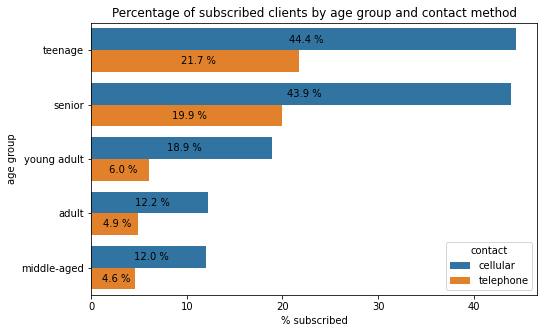

In [46]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_age_contact, y='age group', x='% subscribed', hue='contact')

label0 = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
label1 = ['{:.1f} %'.format(x) for x in fig.containers[1].datavalues]
fig.bar_label(fig.containers[0], labels=label0, padding=3, label_type='center')
fig.bar_label(fig.containers[1], labels=label1, padding=3, label_type='center')

plt.title('Percentage of subscribed clients by age group and contact method')
plt.show()

**Insight**

Jika dilihat berdasarkan kategori usia, tetap menunjukkan hasil yang sama, yaitu semua kategori usia memiliki kemungkinan subscribe lebih tinggi jika dihubungi melalui cellular. Maka dari itu, sebaiknya tim marketing melakukan kontak melalui cellular saja dan ketika ada nasabah baru mendaftar pastikan untuk mencantumkan nomor cellullar. 

In [47]:
df_contact_duration = df.groupby(['contact', 'y']).median()['duration'].to_frame().reset_index()
df_contact_duration = df_contact_duration.sort_values(by='duration', ascending=False)
df_contact_duration

,contact,y,duration
3,telephone,yes,654.0
1,cellular,yes,409.0
2,telephone,no,168.0
0,cellular,no,160.0


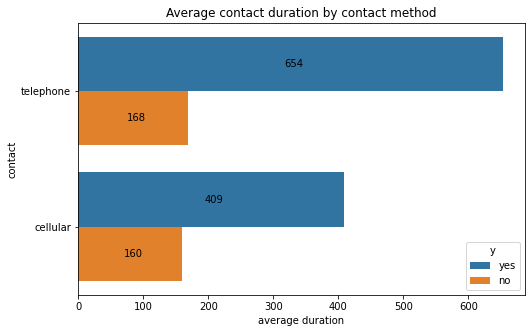

In [48]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_contact_duration, y='contact', x='duration', hue='y')

label0 = ['{:.0f}'.format(x) for x in fig.containers[0].datavalues]
label1 = ['{:.0f}'.format(x) for x in fig.containers[1].datavalues]
fig.bar_label(fig.containers[0], labels=label0, padding=3, label_type='center')
fig.bar_label(fig.containers[1], labels=label1, padding=3, label_type='center')

plt.xlabel('average duration')
plt.title('Average contact duration by contact method')
plt.show()

**Insight**

Nasabah yang dihubungi menggunakan cellular memiliki rata-rata durasi yang lebih cepat sehingga produktivitas dan efisiensi tim marketing dapat meningkat jika menghubungi nasabah menggunakan cellullar. Hal ini terutama dapat dilihat pada rata-rata durasi yang diperlukan untuk meyakinkan nasabah melakukan deposito, jika menggunakan **cellular** maka waktu yang diperlukan **1.6x lebih cepat** dibandingkan menggunakan telephone.

#### Kapan waktu terbaik untuk melakukan kontak terhadap nasabah yang tertarik dengan deposito?

In [49]:
df_day = df.groupby(['day_of_week', 'y']).size().unstack().reset_index()
df_day['total'] = df_day['yes']+df_day['no']
df_day['% subscribed'] = (df_day['yes']/df_day['total']*100).round(2)
df_day = df_day.sort_values(by='% subscribed', ascending=False)
df_day

y,day_of_week,no,yes,total,% subscribed
2,thu,7578,1045,8623,12.12
3,tue,7137,953,8090,11.78
4,wed,7185,949,8134,11.67
0,fri,6981,846,7827,10.81
1,mon,7667,847,8514,9.95


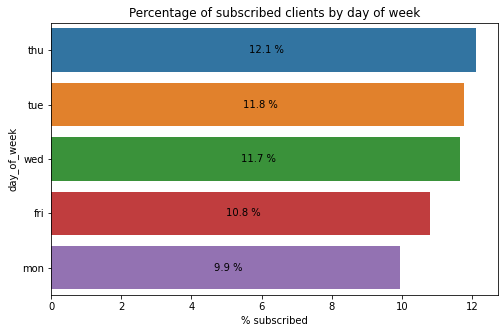

In [50]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_day, y='day_of_week', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed clients by day of week')
plt.show()

**Insight**

Berdasarkan gambar di atas, kita dapat melihat bahwa hari yang memiliki persentase subscribe paling tinggi adalah **thu** (Kamis) yaitu sebesar **12.1%**. Kemudian, kemungkinan nasabah subscribe paling rendah berada pada hari mon (Senin) dan fri (Jumat). Meskipun begitu, perbedaan nilai persentase subscribe dibandingkan hari lain tidak terlalu jauh berbeda. Sebaiknya, kita melakukan uji statistik untuk memastikan apakah hari memiliki pengaruh yang signifikan terhadap jumlah subscribe.

In [51]:
df_chi2 = df.groupby(['day_of_week', 'y']).size().unstack()
df_chi2

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [52]:
stats, pvalue, dof, expected = chi2_contingency(df_chi2)

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.3f}, pvalue > 0.05. Gagal menolak Ho.
    Dengan alpha = 5%, kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    target dan day of week adalah dependent (ada keterkaitan)
    (Proporsi TIDAK berberda signifikan)
    ''')


else:
    print(f'''
    pvalue = {pvalue:.3f}, pvalue < 0.05. Berhasil menolak Ho.
    Dengan alpha = 5%, kita punya cukup bukti untuk mengatakan bahwa 
    target dan day of week adalah dependent (ada keterkaitan)
    (Proporsi berberda signifikan)
    ''')


    pvalue = 0.000, pvalue < 0.05. Berhasil menolak Ho.
    Dengan alpha = 5%, kita punya cukup bukti untuk mengatakan bahwa 
    target dan day of week adalah dependent (ada keterkaitan)
    (Proporsi berberda signifikan)
    


Hasil uji statistik menunjukkan bahwa memang ada perbedaan signifikan antara jumlah subscribe di hari yang berbeda. Oleh karena itu, kita bisa menganggap bahwa hari adalah salah satu feature yang harus dipertimbangkan untuk menentukan target. Tim marketing dapat meningkatkan upaya marketing di pertengahan minggu (**Selasa-Kamis**) karena memiliki kemungkinan subscribe lebih tinggi dibandingkan Senin atau Jumat.

In [53]:
df_month = df.groupby(['month', 'y']).size().unstack().reset_index()
df_month['total'] = df_month['yes']+df_month['no']
df_month['% subscribed'] = (df_month['yes']/df_month['total']*100).round(2)
df_month = df_month.sort_values(by='% subscribed', ascending=False)
df_month

y,month,no,yes,total,% subscribed
5,mar,270,276,546,50.55
2,dec,93,89,182,48.90
9,sep,314,256,570,44.91
8,oct,403,315,718,43.87
0,apr,2093,539,2632,20.48
1,aug,5523,655,6178,10.60
4,jun,4759,559,5318,10.51
7,nov,3685,416,4101,10.14
3,jul,6525,649,7174,9.05
6,may,12883,886,13769,6.43


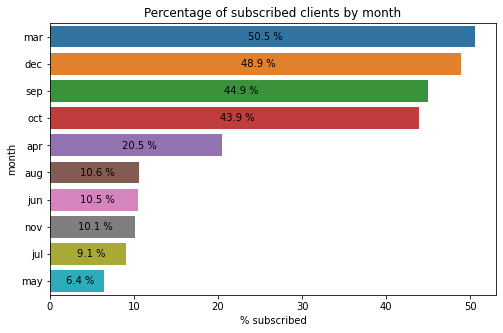

In [54]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_month, y='month', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.title('Percentage of subscribed clients by month')
plt.show()

**Insight**

Kita dapat melihat bahwa bulan **Maret**, **Desember**, **September**, dan **Oktobe**r memiliki persentase subscribe yang jauh lebih tinggi dibandingkan dengan bulan lainnya. Perentase subscribe di bulan tersebut **2-7x** lebih tinggi dibandingkan bulan lainnya.

In [55]:
df_month_euribor = df.groupby(['month']).mean()['euribor3m'].to_frame().reset_index()
df_month_euribor['% subscribed'] = df_month['% subscribed']

df_month_euribor = df_month_euribor.reindex([5,0,6,4,3,1,9,8,7,2], axis=0).reset_index(drop=True)
df_month_euribor

,month,euribor3m,% subscribed
0,mar,1.162745,50.55
1,apr,1.361070,20.48
2,may,3.293665,6.43
3,jun,4.256908,10.51
4,jul,4.685678,9.05
5,aug,4.300623,10.60
6,sep,0.834760,44.91
7,oct,1.200123,43.87
8,nov,3.723123,10.14
9,dec,0.865319,48.90


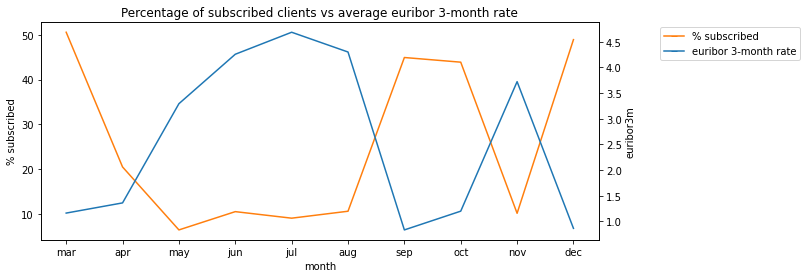

In [56]:
plt.figure(figsize=(10,4))

fig = sns.lineplot(data= df_month_euribor, x='month', y='% subscribed', color="tab:orange")
sns.lineplot(data=df_month_euribor, x='month', y='euribor3m', color="tab:blue", ax=fig.axes.twinx())
fig.legend(handles=[Line2D([], [], marker='_', color="tab:orange", label='% subscribed'), 
                    Line2D([], [], marker='_', color="tab:blue", label='euribor 3-month rate')], 
            bbox_to_anchor=(1.1, 1))

plt.xticks(range(10), ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Percentage of subscribed clients vs average euribor 3-month rate')    
plt.show()        

**Insight**

Setelah kita analisis lebih lanjut, peningkatan persentase subscribe di bulan-bulan tertentu ternyata dipengaruhi oleh rata-rata euribor 3-month rate. Ketika euribor 3-month rate naik, maka persentase subscribe deposito akan turun. Ketika euribor 3-month rate turun, maka persentase subscribe deposito akan naik. Hal ini menunjukkan bahwa target memiliki korelasi negatif dengan euribor 3-month rate, sesuai dengan correlation matrix kita sebelumnya. Kita dapat menyimpulkan bahwa waktu terbaik untuk melakukan kontak kepada nasabah adalah ketika **euribor 3-month rate sedang turun atau di bawah 2**.

#### Berapa lama durasi kontak yang optimal agar nasabah melakukan deposito?


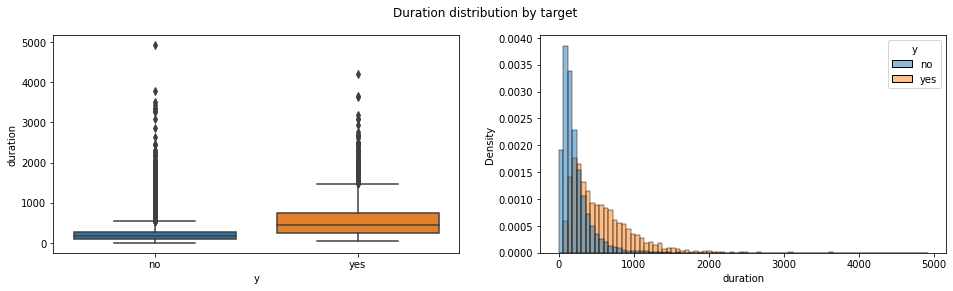

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))

sns.boxplot(data=df, y='duration', x='y', ax=axes[0])
sns.histplot(data=df, x='duration', hue='y', binwidth=60, stat='density', common_norm=False, ax=axes[1])

plt.suptitle('Duration distribution by target')
plt.show()

**Insight**

Berdasarkan kedua gambar di atas, kita dapat melihat bahwa nasabah yang melakukan deposito cenderung memiliki durasi kontak yang lebih lama.

In [58]:
df_age_duration = df.groupby(['age group', 'y']).median()['duration'].to_frame().reset_index()
df_age_duration = df_age_duration.sort_values(by='duration', ascending=False)
df_age_duration

,age group,y,duration
1,adult,yes,528.0
3,middle-aged,yes,501.5
9,young adult,yes,394.0
7,teenage,yes,349.0
5,senior,yes,292.0
6,teenage,no,169.0
8,young adult,no,164.5
0,adult,no,164.0
2,middle-aged,no,163.0
4,senior,no,155.0


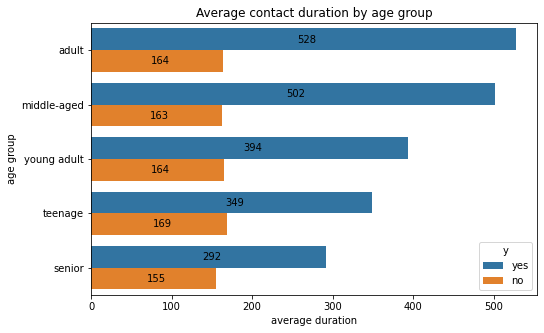

In [59]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_age_duration, y='age group', x='duration', hue='y')

label0 = ['{:.0f}'.format(x) for x in fig.containers[0].datavalues]
label1 = ['{:.0f}'.format(x) for x in fig.containers[1].datavalues]
fig.bar_label(fig.containers[0], labels=label0, padding=3, label_type='center')
fig.bar_label(fig.containers[1], labels=label1, padding=3, label_type='center')

plt.xlabel('average duration')
plt.title('Average contact duration by age group')
plt.show()

Jika kita lihat berdasarkan kategori usia, rata-rata durasi yang diperlukan untuk meyakinkan nasabah melakukan deposito adalah sebagai berikut

| age group | average duration |
| --- | --- |
| adult | 528 |
| middle-aged | 502 |
| young adult | 394 |
| teenage | 349 |
| senior | 292 |

In [60]:
df_job_duration = df.groupby(['job', 'y']).median()['duration'].to_frame().reset_index()
df_job_duration = df_job_duration.sort_values(by='duration', ascending=False)
df_job_duration

,job,y,duration
3,blue-collar,yes,664.0
5,entrepreneur,yes,615.5
15,services,yes,588.0
13,self-employed,yes,465.0
19,technician,yes,459.5
9,management,yes,425.5
7,housemaid,yes,421.0
1,admin.,yes,409.5
21,unemployed,yes,342.5
23,unknown,yes,328.0


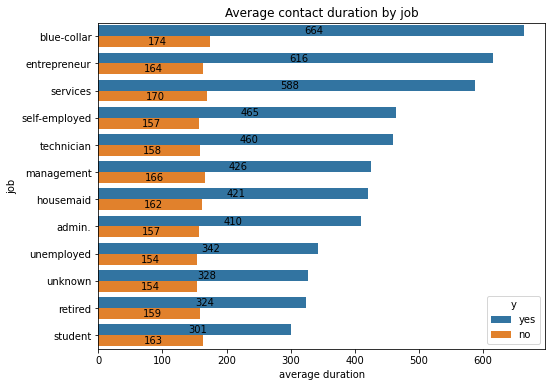

In [61]:
plt.figure(figsize= (8,6))

fig = sns.barplot(data=df_job_duration, y='job', x='duration', hue='y')

label0 = ['{:.0f}'.format(x) for x in fig.containers[0].datavalues]
label1 = ['{:.0f}'.format(x) for x in fig.containers[1].datavalues]
fig.bar_label(fig.containers[0], labels=label0, padding=3, label_type='center')
fig.bar_label(fig.containers[1], labels=label1, padding=3, label_type='center')

plt.xlabel('average duration')
plt.title('Average contact duration by job')
plt.show()

Jika kita lihat berdasarkan pekerjaan, rata-rata durasi yang diperlukan untuk meyakinkan nasabah melakukan deposito adalah sebagai berikut

| age group | average duration |
| --- | --- |
| blue-collar | 664 |
| entrepreneur | 616 |
| services | 588 |
| self-employed | 465 |
| technician | 460 |
| management | 426 |
| housemaid | 421 |
| admin. | 410 |
| unemployed | 342 |
| unknown | 328 |
| retired | 324 |
| student | 301 |

#### Apakah campaign sebelumnya berpengaruh terhadap campaign saat ini?


In [62]:
df_poutcome = df.groupby(['poutcome', 'y']).size().unstack().reset_index()
df_poutcome['total'] = df_poutcome['yes']+df_poutcome['no']
df_poutcome['% subscribed'] = (df_poutcome['yes']/df_poutcome['total']*100).round(2)
df_poutcome = df_poutcome.sort_values(by='% subscribed', ascending=False)
df_poutcome

y,poutcome,no,yes,total,% subscribed
2,success,479,894,1373,65.11
0,failure,3647,605,4252,14.23
1,nonexistent,32422,3141,35563,8.83


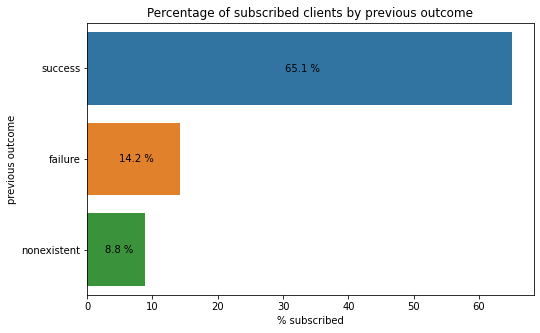

In [63]:
plt.figure(figsize= (8,5))

fig = sns.barplot(data=df_poutcome, y='poutcome', x='% subscribed')

label = ['{:.1f} %'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=3, label_type='center')

plt.ylabel('previous outcome')
plt.title('Percentage of subscribed clients by previous outcome')
plt.show()

**Insight**

Dari sini kita bisa melihat bahwa nasabah yang sebelumnya sudah pernah melakukan deposito (**success**) memiliki kemungkinan deposito pada campaign saat ini **4-7x** lebih tinggi dibandingkan failure dan nonexistent. Maka dari itu, tim marketing dapat mengutamakan kelompok tersebut untuk ditawarkan deposito.


In [64]:
df_previous = df[df['poutcome'] != 'nonexistent']
df_previous = df_previous.groupby([ 'previous','poutcome']).size().unstack().reset_index()
df_previous = df_previous.fillna(0)
df_previous['total'] = df_previous['success']+df_previous['failure']
df_previous['% subscribed'] = (df_previous['success']/df_previous['total']*100).round(2)
df_previous = df_previous.sort_values(by='previous')
df_previous['previous'] = df_previous['previous'].apply(lambda x : str(x))
df_previous

poutcome,previous,failure,success,total,% subscribed
0,1,3696.0,865.0,4561.0,18.97
1,2,434.0,320.0,754.0,42.44
2,3,88.0,128.0,216.0,59.26
3,4,30.0,40.0,70.0,57.14
4,5,3.0,15.0,18.0,83.33
5,6,1.0,4.0,5.0,80.00
6,7,0.0,1.0,1.0,100.00


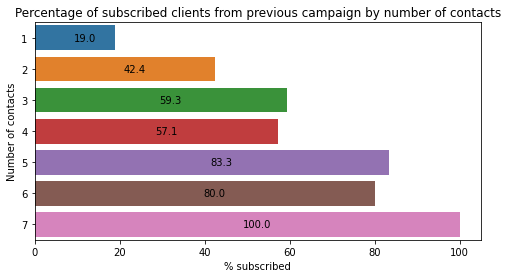

In [65]:
plt.figure(figsize= (8,4))

fig = sns.barplot(data=df_previous, y='previous', x='% subscribed')

label = ['{:.1f}'.format(x) for x in fig.containers[0].datavalues]
fig.bar_label(fig.containers[0], labels=label, padding=10, label_type='center')

plt.ylabel('Number of contacts')
plt.title('Percentage of subscribed clients from previous campaign by number of contacts')
plt.show()

**Insight**

Jika kita melihat hasil (poutcome) dibandingkan dengan jumlah kontak (previous) pada campaign sebelumnya, maka ada kecenderungan semakin banyak kontak yang dilakukan, semakin tinggi juga persentase subscribe nasabah (success). Meskipun begitu, jumlah nasabah yang dikontak lebih dari 4 pada dataset kita hanya sedikit sehingga persentase subscribe terlihat tinggi. Oleh karena itu, sebaiknya tim marketing **minimal** melakukan **kontak** kepada nasabah sebanyak **3x** karena dapat **meningkatkan persentase subscribe hingga 3,12x** dibandingkan nasabah yang hanya dikontak 1x.

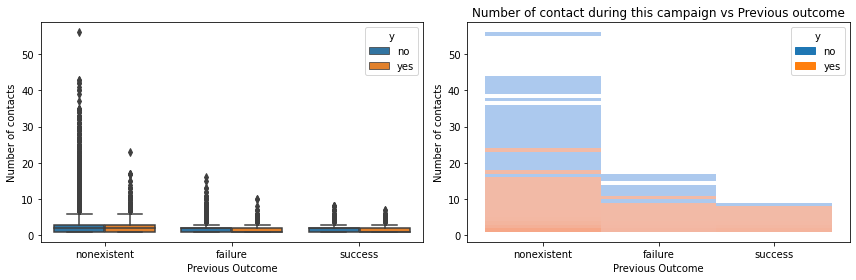

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

ax1 = sns.boxplot(data=df, y='campaign', x='poutcome', hue='y', ax=axes[0])
ax1.set_ylabel('Number of contacts')
ax1.set_xlabel('Previous Outcome')

ax2 = sns.histplot(data=df, y='campaign', x='poutcome', hue='y', binwidth=1, ax=axes[1])
ax2.set_ylabel('Number of contacts')
ax2.set_xlabel('Previous Outcome')

plt.title('Number of contact during this campaign vs Previous outcome')
plt.tight_layout()
plt.show()

**Insight**

Jika kita membandingkan hasil campaign sebelumnya (poutcome) dengan jumlah kontak di campaign saat ini (campaign), maka dapat kita lihat bahwa nasabah yang tertarik dengan deposito cenderung memiliki jumlah kontak yang lebih sedikit dibandingkan nasabah yang tidak tertarik dan ini terjadi pada semua kategori poutcome. Hal ini disebabkan, nasabah yang belum melakukan deposito akan terus dikontak oleh tim marketing sehingga jumlah kontak untuk nasabah yang tidak tertarik cenderung lebih banyak.

Kemudian, jika kita melihat dari jumlah kontak itu sendiri, nasabah yang sudah pernah dihubungi pada campaign sebelumnya (success dan failure) cenderung memerlukan lebih sedikit kontak untuk meyakinkan mereka melakukan deposito, yaitu di bawah 10 kontak. Sedangkan, untuk nasabah yang belum pernah dikontak pada campaign sebelumnya (nonexistent) memerlukan lebih banyak kontak untuk meyakinkan mereka melakukan deposito, yaitu hingga 23 kontak.

Oleh karena itu, tim marketing bisa **memaksimalkan jumlah kontak hingga 10x** untuk nasabah yang sudah pernah dihubungi pada campaign sebelumnya (**success dan failure**) dan **20x** untuk nasabah yang belum pernah dihubungi pada campaign sebelumnya (**nonexistent**). Hal ini dikarenakan jika sudah melewati kedua batas tersebut, kontak yang dilakukan cenderung sia-sia.

## 4. Preprocessing

### Remove Data Duplication

In [67]:
df.shape

(41188, 22)

In [68]:
df.duplicated().sum()

12

In [69]:
df = df.drop_duplicates()

In [70]:
df.shape

(41176, 22)

### Fill Missing Values

In [71]:
df = df.replace('unknown',np.nan)

In [72]:
df.isna().sum()[df.isna().sum()>0]

job           330
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

Job

Kita mengasumsikan 'job' dipengaruhi tingkat pendidikan (education) seseorang. Oleh karenanya kita akan meng-impute missing values pada 'job' berdasarkan pendidikan nasabah.

In [73]:
pd.crosstab(df['education'], df['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
education,,,,,,,,,,,
basic.4y,77,2318,137,474,100,597,93,132,26,58,112
basic.6y,151,1425,71,77,85,75,25,226,13,87,34
basic.9y,499,3623,210,94,166,145,220,388,99,384,186
high.school,3329,878,234,174,298,276,118,2680,357,872,259
illiterate,1,8,2,1,0,3,3,0,0,0,0
professional.course,363,453,135,59,89,241,168,218,43,3317,142
university.degree,5750,94,610,139,2063,284,765,173,170,1809,262


In [74]:
# menampilkan pekerjaan yang paling banyak muncul di tiap jenjang pendidikan
modus = df.groupby('education')['job'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,education,job
0,basic.4y,blue-collar
1,basic.6y,blue-collar
2,basic.9y,blue-collar
3,high.school,admin.
4,illiterate,blue-collar
5,professional.course,technician
6,university.degree,admin.


In [75]:
education = list(modus['education'])
job = list(modus['job'])

for pendidikan, pekerjaan in zip(education, job) :
    df.loc[(df['education'] == pendidikan) & (df['job'].isnull()), 'job'] = pekerjaan

In [76]:
df.isna().sum()[df.isna().sum()>0]

job           131
marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

Kita lihat masih ada 131 missing values pada kolom 'job' dikarenakan kolom 'education'-nya juga NaN. Oleh karenanya kita akan lanjut meng-impute 'job' berdasarkan kelompok usianya ('age group')

In [77]:
pd.crosstab(df['age group'], df['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
age group,,,,,,,,,,,
adult,5736,5023,765,445,1488,53,709,2025,135,3931,526
middle-aged,2486,2789,536,489,1112,876,431,1020,4,1603,309
senior,110,49,17,67,58,784,21,8,0,51,10
teenage,1,7,4,0,0,0,0,3,121,4,0
young adult,2168,1490,134,59,266,5,260,911,615,1162,169


In [78]:
# menampilkan pekerjaan yang paling banyak muncul di tiap kelompok usia
modus = df.groupby('age group')['job'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,age group,job
0,adult,admin.
1,middle-aged,blue-collar
2,senior,retired
3,teenage,student
4,young adult,admin.


In [79]:
age_group = list(modus['age group'])
job = list(modus['job'])

for kelompok_usia, pekerjaan in zip(age_group, job) :
    df.loc[(df['age group'] == kelompok_usia) & (df['job'].isnull()), 'job'] = pekerjaan

In [80]:
df.isna().sum()[df.isna().sum()>0]

marital        80
education    1730
default      8596
housing       990
loan          990
dtype: int64

Education

Kita mengasumsikan 'education' seseorang dapat tergambar dari pekerjaan yang saat ini dimiliki oleh nasabah. Oleh karenanya kita akan meng-impute missing values pada 'education' berdasarkan jenis pekerjaan nasabah.

In [81]:
# menampilkan pendidikan yang paling banyak muncul di tiap jenis pekerjaan
modus = df.groupby('job')['education'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,job,education
0,admin.,university.degree
1,blue-collar,basic.9y
2,entrepreneur,university.degree
3,housemaid,basic.4y
4,management,university.degree
5,retired,basic.4y
6,self-employed,university.degree
7,services,high.school
8,student,high.school
9,technician,professional.course


In [82]:
education = list(modus['education'])
job = list(modus['job'])

for pendidikan, pekerjaan in zip(education, job) :
    df.loc[(df['job'] == pekerjaan) & (df['education'].isnull()), 'education'] = pendidikan

In [83]:
df.isna().sum()[df.isna().sum()>0]

marital      80
default    8596
housing     990
loan        990
dtype: int64

Marital

Kita mengasumsikan status 'marital' nasabah dipengaruhi oleh usia (age group). Oleh karenanya kita akan meng-impute missing values pada 'marital' berdasarkan 'age group'.

In [84]:
pd.crosstab(df['age group'], df['marital'])

marital,divorced,married,single
age group,,,
adult,2140,12830,5858
middle-aged,2018,8775,917
senior,224,926,40
teenage,0,1,139
young adult,229,2389,4610


In [85]:
# menampilkan status 'marital' yang paling banyak muncul di tiap kelompok usia
modus = df.groupby('age group')['marital'].apply(pd.Series.mode).xs(0,level=1).to_frame().reset_index()
modus

,age group,marital
0,adult,married
1,middle-aged,married
2,senior,married
3,teenage,single
4,young adult,single


In [86]:
marital = list(modus['marital'])
age_group = list(modus['age group'])

for status, kelompok_umur in zip(marital, age_group) :
    df.loc[(df['age group'] == kelompok_umur) & (df['marital'].isnull()), 'marital'] = status

In [87]:
df.isna().sum()[df.isna().sum()>0]

default    8596
housing     990
loan        990
dtype: int64

Housing

In [88]:
pd.crosstab(df['job'], df['housing'])

housing,no,yes
job,,
admin.,4678,5624
blue-collar,4401,4798
entrepreneur,641,779
housemaid,491,540
management,1363,1490
retired,786,905
self-employed,641,740
services,1817,2049
student,381,471


In [89]:
pd.crosstab(df['marital'], df['housing'])

housing,no,yes
marital,,
divorced,2092,2398
married,11421,12978
single,5102,6195


In [90]:
pd.crosstab(df['age group'], df['housing'])

housing,no,yes
age group,,
adult,9445,10927
middle-aged,5328,6117
senior,520,643
teenage,50,86
young adult,3272,3798


Kita dapati bahwa untuk setiap jenis pekerjaan, status pernikahan dan juga kelompok usia, mayoritas nasabah memiliki pinjaman KPR, oleh karenanya kita akan impute 'housing' dengan 'yes'.

In [91]:
df['housing'].fillna('yes', inplace=True)

In [92]:
df.isna().sum()[df.isna().sum()>0]

default    8596
loan        990
dtype: int64

Loan

In [93]:
pd.crosstab(df['job'], df['loan'])

loan,no,yes
job,,
admin.,8570,1732
blue-collar,7802,1397
entrepreneur,1214,206
housemaid,877,154
management,2414,439
retired,1449,242
self-employed,1186,195
services,3265,601
student,710,142


In [94]:
pd.crosstab(df['marital'], df['loan'])

loan,no,yes
marital,,
divorced,3815,675
married,20615,3784
single,9508,1789


In [95]:
pd.crosstab(df['age group'], df['loan'])

loan,no,yes
age group,,
adult,17214,3158
middle-aged,9662,1783
senior,1002,161
teenage,113,23
young adult,5947,1123


Kita dapati bahwa untuk setiap jenis pekerjaan, status pernikahan dan juga kelompok usia, mayoritas nasabah tidak memiliki pinjaman personal, oleh karenanya kita akan impute 'loan' dengan 'no'.

In [96]:
df['loan'].fillna('no', inplace=True)

In [97]:
df.isna().sum()[df.isna().sum()>0]

default    8596
dtype: int64

### Handling Outliers

In [98]:
numerical_cols = list(set(df.columns)-set(categorical_cols))

In [99]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_cols: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_cols,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,duration,-223.5000,644.5000,0,38213,2963,7.20
1,cons.conf.idx,-52.1500,-26.9500,0,40730,446,1.08
2,emp.var.rate,-6.6000,6.2000,0,41176,0,0.00
3,pdays,999.0000,999.0000,1515,39661,0,3.68
4,previous,0.0000,0.0000,0,35551,5625,13.66
5,cons.price.idx,91.6965,95.3725,0,41176,0,0.00
6,campaign,-2.0000,6.0000,0,38770,2406,5.84
7,age,9.5000,69.5000,0,40708,468,1.14
8,nr.employed,4905.6000,5421.6000,0,41176,0,0.00
9,euribor3m,-4.0815,10.3865,0,41176,0,0.00


Kita dapati bahwa terdapat outliers pada kolom previous, campaign, pdays, age, dan cons.conf.idx

In [100]:
df['y'].value_counts()/len(df)

no     0.887337
yes    0.112663
Name: y, dtype: float64

In [101]:
df[df['previous']>0]['y'].value_counts()/len(df[df['previous']>0])

no     0.733511
yes    0.266489
Name: y, dtype: float64

In [102]:
df[df['campaign']>6]['y'].value_counts()/len(df[df['campaign']>6])

no     0.953865
yes    0.046135
Name: y, dtype: float64

In [103]:
df[df['pdays']<999]['y'].value_counts()/len(df[df['pdays']<999])

yes    0.638284
no     0.361716
Name: y, dtype: float64

In [104]:
df[df['age']>69.5]['y'].value_counts()/len(df[df['age']>69.5])

no     0.527778
yes    0.472222
Name: y, dtype: float64

In [105]:
df[df['cons.conf.idx']>-26.9500]['y'].value_counts()/len(df[df['cons.conf.idx']>-26.9500])

no     0.596413
yes    0.403587
Name: y, dtype: float64

Kita dapati bahwa data-data outlier tersebut memiliki proporsi 'yes' dan 'no' pada kolom 'y' yang berbeda dibandingkan seluruh data. Oleh karenanya kita tidak akan hilangkan outlier tersebut karena data outlier tersebut memiliki informasi yang berpengaruh terhadap target.

### Feature Engineering

Hapus Kolom Durasi

Lamanya durasi tidak diketahui sebelum dilakukannya kontak dengan nasabah dan baru akan diketahui setelah kontak berakhir. Padahal kita ingin menentukan nasabah yang memiliki kecenderungan memesan deposito sebelum dilakukannya panggilan. Oleh karenanya kolom durasi hanya digunakan dalam analisis data namun akan dikeluarkan dalam prediksi agar model lebih realistis.

In [106]:
df.drop(columns='duration', inplace=True)

Hapus Kolom Default

In [107]:
df['default'].value_counts()

no     32577
yes        3
Name: default, dtype: int64

Kolom default hanya memiliki 3 nilai yaitu, 'no', 'unknown' dan 'yes'. Dimana nilai 'no' merupakan nilai mayoritas sedangkan nilai 'unknown' dapat dianggap sebagai missing values. Oleh karenanya, kita akan menghapus kolom 'default' karena tidak memiliki variansi data sehingga tidak berpengauh terhadap target.

In [108]:
df.drop(columns='default', inplace=True)

Hapus Kolom Age Group

Kita akan menghapus kolom 'age group' karena sudah terwakili oleh kolom 'age'

In [109]:
df.drop(columns='age group', inplace=True)

### Encoding

In [110]:
categorical_cols = list(df.select_dtypes(['object','category']).columns)

In [111]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in categorical_cols[:-1] :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,job,11,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed]"
1,marital,3,"[divorced, married, single]"
2,education,7,"[basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,2,"[cellular, telephone]"
6,month,10,"[apr, aug, dec, jul, jun, mar, may, nov, oct, sep]"
7,day_of_week,5,"[fri, mon, thu, tue, wed]"
8,poutcome,3,"[failure, nonexistent, success]"


Sekarang mari kita melakukan fitur encoding untuk fitur-fitur categorical yang kita miliki.
Yang akan kita lakukan adalah :


1. Merubah fitur/kolom `job` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `marital` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
3. Merubah fitur/kolom `housing` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
4. Merubah fitur/kolom `loan` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
5. Merubah fitur/kolom `contact` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
6. Merubah fitur/kolom `month` menjadi integer dengan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
7. Merubah fitur/kolom `day_of_week` menjadi integer dengan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
8. Merubah fitur/kolom `education` menjadi integer dengan Ordinal Encoding. Untuk nilainya akan kita urutkan berdasarkan jenjang pendidikan dari yang terendah ke yang tertinggi.
9. Merubah fitur/kolom `poutcome` menjadi integer dengan Ordinal Encoding. Untuk nilainya akan kita urutkan berdasarkan deposit rate dimana 'success' akan kita ubah menjadi 2, 'failure' kita ubah menjadi 1, dan sisanya 'nonexistent' diubah menjadi 0.


In [112]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'education', 'mapping':{None:0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5,  'professional.course':6, 'university.degree':7}},
    {'col':'poutcome', 'mapping':{None:0, 'success':2, 'failure':1, 'nonexistent':0}}
]

In [113]:
transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week']),
    ('ordinal', ce.OrdinalEncoder(cols=['education','poutcome'], mapping=ordinal_mapping), ['education', 'poutcome']),
], remainder='passthrough')

### Scaling

Kita akan menggunakan Robust Scaler karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier. Kita dapat mengatur ulang scaler nantinya untuk mendapatkan scaler terbaik.

In [114]:
scaler = RobustScaler()

### Imbalance Data

In [115]:
df['y'].value_counts() / len(df)

no     0.887337
yes    0.112663
Name: y, dtype: float64

Kita dapat melihat bahwa dataset tidak seimbang (moderate imbalance) karena proporsi kelas minoritas sebesar 11.26%.\
Untuk mensiasati hal tersebut nantinya kita dapat menguji apakah modelling perlu menerapkan metode resampling agar data kita memiliki distribusi kelas yang lebih seimbang atau tidak.

Adapun metode resampling yang akan dipakai adalah Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). Hal ini dikarenakan : 
- untuk menghindari terbuangnya data pada kelas mayoritas jika menggunakan undersampling sehingga dapat menghilangkan
informasi penting pada data tersebut. 
- untuk menghindari overfitting karena penduplikasian data yang telah ada sebelumnya sehingga pengklasifikasi terkena informasi yang sama jika menggunakan Random Oversampling.
- pada data kita terdapat fitur yang numerikal (continuous) and kategorikal (nominal).

In [116]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

In [117]:
# define oversampling 
resample = SMOTENC(random_state=0, categorical_features=[3, 12]) #['education', 'poutcome']
       

### Change Value

Kita ubah terlebih dahulu nilai pada kolom `y` dari 'yes' dan 'no' menjadi 1 dan 0. Karena fokus utama kita adalah yang memesan deposit, maka :

Target :

0 : Tidak memesan deposito (`y` == 'no')

1 : Memesan deposito (`y` == 'yes')

In [118]:
df['y'] = np.where(df['y']=='yes',1,0)
df['y'].unique()

array([0, 1])

## 5. Methodology (Modeling/Analysis)

### Define features and target

In [119]:
X = df.drop('y', axis=1)
y = df['y']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

### Benchmark Model

Model benchmarking adalah metode untuk mengevaluasi dan membandingkan algoritma ML terkait kemampuannya dalam mempelajari data. Metrik yang akan digunakan untuk mengukur kinerja model kita adalah recall. Metrik ini dipilih karena target false negatif memberikan cost yang jauh lebih besar dibandingkan false positive. kita akan memutuskan model terbaik kita berdasarkan recall yang paling optimal.

In [121]:
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
dtree = DecisionTreeClassifier(random_state=0, max_depth=5)
rf = RandomForestClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
gbm = GradientBoostingClassifier(random_state=0)
lgbm = lgb.LGBMClassifier()
xgboost = XGBClassifier()


models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
    ]

In [122]:
def cross_val(X_train, y_train, models, scoring):

    list_name = []
    list_precision = []
    list_recall = []
    list_fit_time = []
    list_score_time = []

    for name, model in models:
        
        if (name == 'Logistic Regression') or (name == 'KNN'):
            pipe_model = Pipeline([
                ('preprocessing', transformer),
                ('scaler', scaler),
                ('algo', model)
            ])

        else:
            pipe_model = Pipeline([
                ('preprocessing', transformer),
                ('algo', model)
            ])
            
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_validate(
            estimator= pipe_model,
            X= X_train,
            y= y_train,
            cv= skfold,
            scoring= scoring
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_precision.append(round(model_cv['test_precision'].mean(), 3))
        list_recall.append(round(model_cv['test_recall'].mean(), 3))

    result = pd.DataFrame({
        'model' : list_name,
        'mean recall' : list_recall,
        'mean precision' : list_precision,
        'fit time' : list_fit_time,
        'score time' : list_score_time,
    })    

    return result.sort_values(f'mean recall', ascending=False)

In [123]:
cross_val(X_train, y_train, models, ['recall', 'precision'])

,model,mean recall,mean precision,fit time,score time
1,KNN,0.296,0.542,0.370,1.035
7,Xgboost,0.296,0.598,4.511,0.081
3,Random Forest,0.293,0.555,5.535,0.301
2,Decision Tree,0.278,0.642,0.387,0.057
6,Light GBM,0.276,0.650,0.852,0.077
5,Gradient Boosting,0.260,0.668,9.406,0.064
0,Logistic Regression,0.227,0.659,1.055,0.068
4,AdaBoost,0.218,0.667,3.497,0.205


Berdasarkan hasil di atas, kita dapat melihat bahwa nilai recall yang kita dapatkan masih sangat rendah sehingga kita tidak bisa memilih algoritma terbaik berdasarkan nilai tersebut. Hal ini dikarenakan target kita bersifat imbalance sehingga model kita tidak dapat belajar dengan baik. Oleh karena itu, kita akan mencoba memberikan perlakuan oversampling untuk melihat apakah performa model akan meningkat.Setelah itu, kita bisa menentukan algoritma terbaik untuk model kita. 

### Benchmark Model with Oversampling

In [124]:
def cross_val_oversampling(X_train, y_train, models, scoring, resample):

    list_name = []
    list_precision = []
    list_recall = []
    list_fit_time = []
    list_score_time = []

    for name, model in models:
        
        if (name == 'Logistic Regression') or (name == 'KNN'):
            pipe_model = Pipeline([
                ('preprocessing', transformer),
                ('oversampling', resample),
                ('scaler', scaler),
                ('algo', model)
            ])

        else:
            pipe_model = Pipeline([
                ('preprocessing', transformer),
                ('oversampling', resample),
                ('algo', model)
            ])
            
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

        model_cv = cross_validate(
            estimator= pipe_model,
            X= X_train,
            y= y_train,
            cv= skfold,
            scoring= scoring
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_precision.append(round(model_cv['test_precision'].mean(), 3))
        list_recall.append(round(model_cv['test_recall'].mean(), 3))

    result = pd.DataFrame({
        'model' : list_name,
        f'mean recall' : list_recall,
        f'mean precision' : list_precision,
        'fit time' : list_fit_time,
        'score time' : list_score_time,
    })    

    return result.sort_values(f'mean recall', ascending=False)

In [125]:
cross_val_oversampling(X_train, y_train, models, ['recall', 'precision'], resample)

,model,mean recall,mean precision,fit time,score time
0,Logistic Regression,0.626,0.335,4.051,0.064
1,KNN,0.510,0.306,2.795,1.151
2,Decision Tree,0.508,0.461,2.681,0.049
4,AdaBoost,0.455,0.459,8.860,0.215
5,Gradient Boosting,0.402,0.510,24.495,0.117
3,Random Forest,0.331,0.516,13.896,0.341
6,Light GBM,0.315,0.583,4.760,0.089
7,Xgboost,0.308,0.571,10.047,0.092


Setelah dilakukan oversampling, kita dapat melihat bahwa performa recall dari model kita meningkat. Maka dari itu, kita akan menggunakan oversampling dalam model kita. Berdasarkan tabel di atas, 3 algoritma dengan recall terbaik adalah Logistic Regression, Decision Tree, dan KNN. Ketiga model terbaik cenderung menggunakan algoritma yang sederhana. Sebaliknya, model dengan algoritma lebih kompleks seperti gradient boosting cenderung memiliki recall yang lebih buruk. Untuk mendapatkan hasil yang lebih meyakinkan, kita akan coba melakukan sedikit tuning pada parameter setiap algoritma.

### Tuning 1 Hyperparameter

Pada tahapan kali ini kita akan mencoba mengatur hyperparameter pada setiap model, namun kita fokuskan pada hyperparameter yang paling penting saja.

Berdasarkan artikel [disini](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/), tidak semua hyperparameter pada model memiliki tingkat kepentingan yang sama. Beberapa hyperparameter memiliki efek besar pada perilaku dan kinerja algoritma machine learning. Oleh karenanya kita akan fokus untuk tuning 1 hyperparameter saja pada tiap model.

Hyperparameters yang akan kita coba tuning untuk masing-masing model diantaranya yaitu :

- Logistic Regression --> **solver** : [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
- KNN --> **n_neighbors** : [bilangan ganjil dari 1 - 21]
- Decision Tree --> **max_depth** : [dari 1 sampai 10]
- Random Forest --> **max_depth** : [dari 3 sampai 10]
- AdaBoost --> **learning_rate** : [0.001, 0.01, 0.1]
- GradientBoost --> **learning_rate** : [0.001, 0.01, 0.1]
- XGBoost --> **scale_pos_weight** : [2, 3, 5, 10, 20, 30]
- LightGBM --> **scale_pos_weight** : [2, 3, 5, 10, 20, 30]

In [126]:
param_logreg = {'algo__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
param_knn = {'algo__n_neighbors' : range(1,22,2)}
param_tree = {'algo__max_depth' : range(1,11,1)}
param_rf = {'algo__max_depth' : range(3,11,1)}
param_ada = {'algo__learning_rate' : [0.001, 0.01, 0.1]}
param_grad = {'algo__learning_rate' : [0.001, 0.01, 0.1]}
param_xgb = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}
param_lgbm = {'algo__scale_pos_weight' : [2, 3, 5, 10, 20, 30]}

params = [param_logreg, param_knn, param_tree, param_rf, param_ada, param_grad, param_xgb, param_lgbm]

In [127]:
list_name = []
list_best_param = []
list_best_score = []

for (name, model), param in zip(models,params):

    hyperparam_space = param

    if (name == 'Logistic Regression') or (name == 'KNN'):
            benchmark_model = Pipeline([
                ('preprocessing', transformer),
                ('oversampling', resample),
                ('scaler', scaler),
                ('algo', model)
            ])

    else:
        benchmark_model = Pipeline([
            ('preprocessing', transformer),
            ('oversampling', resample),
            ('algo', model)
        ])    

    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    grid_search = GridSearchCV(
        estimator = benchmark_model,
        param_grid=hyperparam_space,
        cv=skfold,
        scoring='recall',
        n_jobs=-1,
    )

    grid_search.fit(X_train, y_train)
    list_name.append(name)
    list_best_param.append(grid_search.best_params_)
    list_best_score.append(grid_search.best_score_)


grid_result_recall = pd.DataFrame({'model':list_name,
             'best param': list_best_param,
             'best recall': list_best_score,
             }).sort_values('best recall', ascending=False)

grid_result_recall

c:\Users\mzulfikarmuslim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,model,best param,best recall
6,Light GBM,{'algo__scale_pos_weight': 30},0.872375
7,Xgboost,{'algo__scale_pos_weight': 30},0.760851
0,Logistic Regression,{'algo__solver': 'saga'},0.692439
3,Random Forest,{'algo__max_depth': 3},0.646165
4,AdaBoost,{'algo__learning_rate': 0.1},0.573153
1,KNN,{'algo__n_neighbors': 21},0.569698
5,Gradient Boosting,{'algo__learning_rate': 0.01},0.567403
2,Decision Tree,{'algo__max_depth': 3},0.564531


Setelah kita melakukan tuning, kita dapat melihat bahwa ada peningkatakan yang signifikan pada nilai recall. Kita akan mencoba melakukan cross-validation lagi sesuai dengan parameter terbaik yang sudah di tuning.

### Benchmark Model 2

In [128]:
logreg = LogisticRegression(random_state=0, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=21)
dtree = DecisionTreeClassifier(random_state=0, max_depth=3)
rf = RandomForestClassifier(random_state=0, max_depth=3)
ada = AdaBoostClassifier(random_state=0, learning_rate=0.1)
gbm = GradientBoostingClassifier(random_state=0, learning_rate=0.01,)
lgbm = lgb.LGBMClassifier(scale_pos_weight=30)
xgboost = XGBClassifier(scale_pos_weight=30)


models = [
    ('Logistic Regression', logreg), 
    ('KNN', knn),
    ('Decision Tree', dtree),
    ('Random Forest', rf), 
    ('AdaBoost', ada),
    ('Gradient Boosting', gbm),
    ('Light GBM', lgbm),
    ('Xgboost', xgboost)
    ]

In [129]:
print('Benchmark Model 2 without Oversampling')
cross_val(X_train, y_train, models, ['recall', 'precision'])

Benchmark Model 2 without Oversampling


,model,mean recall,mean precision,fit time,score time
6,Light GBM,0.861,0.161,0.461,0.050
7,Xgboost,0.753,0.185,2.989,0.067
1,KNN,0.249,0.619,0.281,0.928
0,Logistic Regression,0.227,0.659,0.746,0.063
2,Decision Tree,0.189,0.702,0.265,0.051
4,AdaBoost,0.184,0.706,2.393,0.137
3,Random Forest,0.168,0.731,1.525,0.108
5,Gradient Boosting,0.128,0.759,6.810,0.057


In [130]:
print('Benchmark Model 2 with Oversampling')
cross_val_oversampling(X_train, y_train, models, ['recall', 'precision'], resample)

Benchmark Model 2 with Oversampling


,model,mean recall,mean precision,fit time,score time
6,Light GBM,0.872,0.153,2.866,0.049
7,Xgboost,0.761,0.176,8.190,0.063
3,Random Forest,0.646,0.319,4.662,0.108
0,Logistic Regression,0.626,0.335,3.019,0.053
4,AdaBoost,0.573,0.342,6.470,0.163
1,KNN,0.570,0.332,2.239,0.863
5,Gradient Boosting,0.567,0.420,17.355,0.067
2,Decision Tree,0.565,0.371,2.389,0.055


Berdasarkan hasil cross-validation menggunakan oversampling maupun tidak, dua algoritma terbaik adalah **Light GBM** dan **Xgboost**. Jika kita lihat berdasarkan waktu yang diperlukan untuk training (fit time), maka kita dapat melihat bahwa penggunaan oversampling memerlukan waktu yang jauh lebih lama dibandingkan tidak. Selain itu, parameter `scale_pos_weight` pada Light GBM dan Xgboost sudah **bisa mengatasi target imbalance** sehingga tidak perlu  dilakukan oversampling lagi. Hal ini sesuai dengan nilai recall dan precision Light GBM dan Xgboost yang tidak terlalu jauh berbeda antara menggunakan oversampling atau tidak. Oleh karena itu, kita tidak perlu menggunakan oversampling dalam model kita.

### Hyperparameter Tuning

#### Light GBM Tuning


[official documentation of Light GBM](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html) menyatakan bahwa untuk mendapatkan akurasi yang lebih baik, kita dapat mencoba:
- menggunakn nilai max_bin yang besar (komputasi lambat)
- menggunakn nilai learning_rate yang kecil dengan nilai num_iterations yang besar
- menggunakn num_leaves yang besar (dapat menyebabkan over-fitting)
- menggunakn training data yang lebih besar
- menggunakan basis model dart

Berikut beberapa parameter yang akan kita coba:
- **max_bin** = max number of bins that feature values will be bucketed in.
- **n_estimators** = number of boosting iterations. Increasing this number improves the optimality of splits at the cost of higher computation time.
- **learning rate** = shrinkage rate to prevents overfitting. 
- **num_leaves** (min_split_loss) = max number of leaves in one tree
- **scale_pos_weight** = weight of labels with positive class




In [131]:
hyperparam_space = {
    'algo__max_bin': [255, 275, 300, 350],
    'algo__num_leaves':[51, 61, 71, 81],
    'algo__n_estimators': range(70, 121, 10),
    'algo__learning_rate': [0.1, 0.05, 0.03, 0.01],
    'algo__scale_pos_weight' : [10, 20, 30]
}

pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('algo', lgbm)          
    ])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

lgbm_tuning = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= skfold,
    scoring= 'recall',
    n_jobs= -1,
    n_iter= 100,
    random_state= 0
)

lgbm_tuning.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'day_of_week']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['education',
                                                                                                    'poutcome'],
                                                                                              ma...
                                                                                                                    'success': 2}}]),
                                                                               ['education',
                                                                                'poutcome'])])),
                                             ('algo',
                                              LGBMClassifier(scale_pos_weight=30))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algo__learning_rate': [0.1, 0.05, 0.03,
                                                                0.01],
                                        'algo__max_bin': [255, 275, 300, 350],
                                        'algo__n_estimators': range(70, 121, 10),
                                        'algo__num_leaves': [51, 61, 71, 81],
                                        'algo__scale_pos_weight': [10, 20, 30]},
                   random_state=0, scoring='recall')

In [132]:
lgbm_tuning.best_params_

{'algo__scale_pos_weight': 30,
 'algo__num_leaves': 51,
 'algo__n_estimators': 100,
 'algo__max_bin': 300,
 'algo__learning_rate': 0.03}

In [133]:
lgbm_tuning.best_score_

0.875253865872819

In [134]:
lgbm_tuning.cv_results_['std_test_score'][lgbm_tuning.best_index_]

0.012216174676705199

**Summary**

| Model | recall |
|--- | --- | 
| Light GBM benchmark | 0.861 |
| Light GBM tuned | 0.875 |

Performa model meningkat setelah dilakukan tuning. Parameter terbaik untuk Light GBM adalah 
- num_leaves: 51
- n_estimators: 100
- max_bin: 300
- learning_rate: 0.03
- scale_pos_weight: 30


#### Xgboost Tuning

Ada banyak [paramaters](https://xgboost.readthedocs.io/en/stable/parameter.html) yang dapat di tuning pada Xgboost. Pada kesempatan kali ini, kita akan mencoba :
- **max_bin** = maximum number of discrete bins to bucket continuous features.
- **n_estimators** = number of runs XGBoost will try to learn. Increasing this number improves the optimality of splits at the cost of higher computation time.
- **eta** (learning rate) = Step size shrinkage used in update to prevents overfitting. 
- **gamma** (min_split_loss) = Minimum loss reduction required to make a further partition on a leaf node of the tree.The larger gamma is, the more conservative the algorithm will be.
- **max_depth** = Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
- **scale_pos_weight** = Control the balance of positive and negative weights, useful for unbalanced classes.

In [135]:
hyperparam_space = {
    'algo__max_bin': [255, 275, 300, 350],
    'algo__n_estimators': range(70, 101, 5),
    'algo__eta': [0.2, 0.1, 0.05],
    'algo__gamma': [0, 0.1, 0.2],
    'algo__max_depth' : range(5, 11),
    'algo__scale_pos_weight' : [10, 20, 30]
}

pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('algo', xgboost)          
    ])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

xgboost_tuning = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv= skfold,
    scoring= 'recall',
    n_jobs= -1,
    n_iter= 50,
    random_state= 0
)

xgboost_tuning.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                                'day_of_week']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=['education',
                                                                                                    'poutcome'],
                                                                                              ma...
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=None,
                                                            reg_alpha=None,
                                                            reg_lambda=None, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'algo__eta': [0.2, 0.1, 0.05],
                                        'algo__gamma': [0, 0.1, 0.2],
                                        'algo__max_bin': [255, 275, 300, 350],
                                        'algo__max_depth': range(5, 11),
                                        'algo__n_estimators': range(70, 101, 5),
                                        'algo__scale_pos_weight': [10, 20, 30]},
                   random_state=0, scoring='recall')

In [136]:
xgboost_tuning.best_params_

{'algo__scale_pos_weight': 30,
 'algo__n_estimators': 100,
 'algo__max_depth': 5,
 'algo__max_bin': 255,
 'algo__gamma': 0.1,
 'algo__eta': 0.05}

In [137]:
xgboost_tuning.best_score_

0.9451033655833954

In [138]:
xgboost_tuning.cv_results_['std_test_score'][xgboost_tuning.best_index_]

0.008762705419407088

**Summary**

| Model | recall |
|--- | --- |
| Xgboost benchmark | 0.753 |
| Xgboost tuned | 0.945 |

Performa model meningkat setelah dilakukan tuning. Parameter terbaik untuk Xgboost adalah 
- n_estimators: 100
- max_depth: 5
- max_bin: 255
- gamma: 0.1
- eta: 0.05
- scale_pos_weight : 30

Selanjutnya kita akan mencoba performa model pada test set.

### Prediction on Test Set

In [139]:
tuned_xgboost = xgboost_tuning.best_estimator_
tuned_lgbm = lgbm_tuning.best_estimator_

pipe_xgboost = pipe_model = Pipeline([
                ('preprocessing', transformer),
                ('algo', xgboost)
            ])

pipe_lgbm = pipe_model = Pipeline([
                ('preprocessing', transformer),
                ('algo', lgbm)
            ])

prediction_models = {
    ('Xgboost benchmark', pipe_xgboost),
    ('Light GBM benchmark', pipe_lgbm),
    ('Xgboost tuned', tuned_xgboost),
    ('Light GBM tuned', tuned_lgbm)
}

Untuk membantu kita menentukan nilai recall yang optimal pada permasalahan bisnis kita, maka kita akan membuat function untuk menghitung perkiraan profit yang akan didapatkan berdasarkan performa model.

In [140]:
def profitEstimation(y_actual, y_pred):
    cm = confusion_matrix(y_actual, y_pred).ravel().tolist()
    profit = 0 * cm[2]+ 0 * cm[0] - 1.44 * cm[1] + (31.75 - 1.44) * cm[3]
    return profit


Profit without Model = 22007


,model,recall,precision,false positive rate,profit,fit time,score time
1,Light GBM benchmark,0.888,0.156,0.61,23223,0.669,0.073
3,Light GBM tuned,0.887,0.155,0.61,23124,0.953,0.071
2,Xgboost tuned,0.954,0.130,0.81,22838,2.952,0.065
0,Xgboost benchmark,0.775,0.178,0.46,21263,3.898,0.077


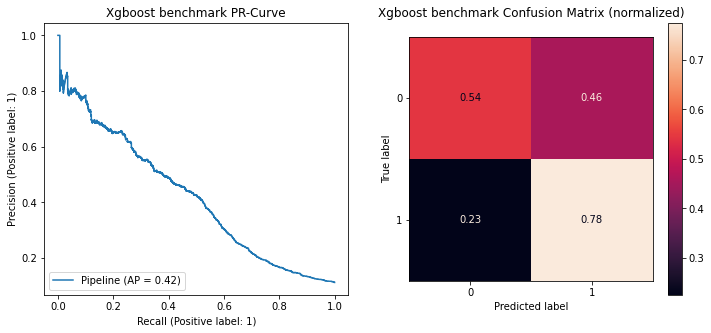

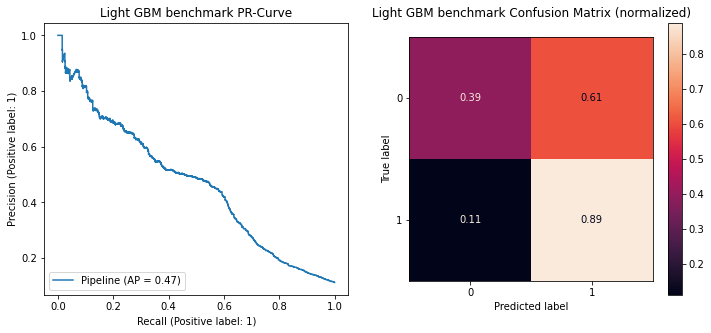

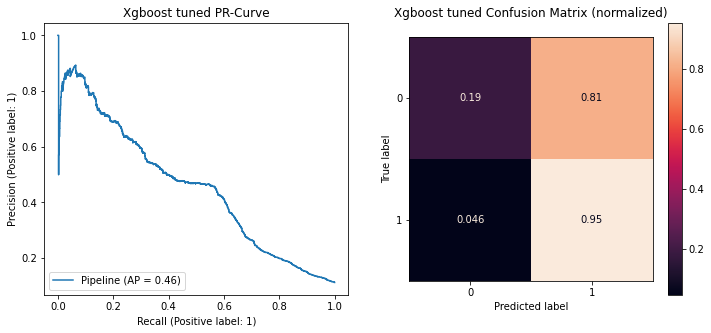

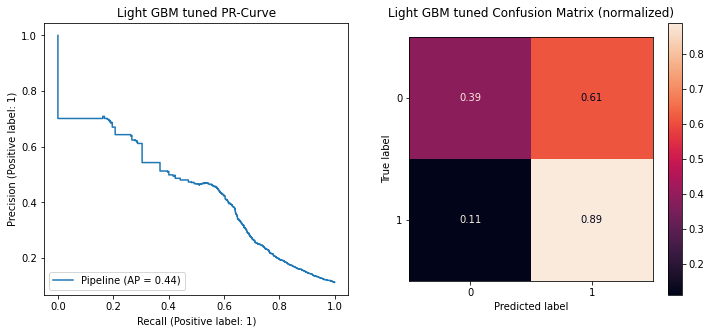

In [141]:
list_model = []
list_precision = []
list_recall = []
list_fpr = []
list_profit = []
fit_time = []
score_time = []

for name, model in prediction_models:        
        
        start = time.time()
        model.fit(X_train, y_train)
        stop = time.time()
        fit_time.append(round((stop-start), 3))

        start = time.time()        
        y_pred = model.predict(X_test)
        stop = time.time()
        score_time.append(round((stop-start), 3))

        fig, ax = plt.subplots(1,2, figsize=(12, 5))

        ax1 = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax[0])
        ax[0].set_title(f'{name} PR-Curve')
        ax2 = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='rocket', ax=ax[1])
        ax[1].set_title(f'{name} Confusion Matrix (normalized)', pad = 20)
        

        list_model.append(name)
        list_precision.append(round(precision_score(y_test, y_pred), 3))
        list_recall.append(round(recall_score(y_test, y_pred), 3))
        list_fpr.append(confusion_matrix(y_test, y_pred, normalize='true')[0][1].round(2))
        list_profit.append(round(profitEstimation(y_test, y_pred)))

print(f'Profit without Model = {round((y_test == 1).sum()*31.75 - len(y_test)*1.44)}')

pd.DataFrame({
    'model': list_model,
    'recall' : list_recall,
    'precision' : list_precision,
    'false positive rate': list_fpr,
    'profit': list_profit,
    'fit time': fit_time,
    'score time': score_time
}).sort_values('profit', ascending=False)   

Untuk menentukan model terbaik sesuai dengan permasalahan bisnis kita, maka kita memerlukan model yang dapat memberikan profit tertinggi kepada bisnis yang artinya kinerja tim marketing menjadi lebih efisien dan efektif. Kita juga memerlukan model yang memiliki performa lebih baik dibandingkan performa tim marketing tanpa model.

Jika kita hanya melihat pada metrik recall dan precision, kita akan menganggap bahwa model Xgboost tuned adalah model terbaik karena memiliki recall tertinggi dengan precision yang tidak jauh berbeda dengan model lain. Akan tetapi, jika kita melihat pada profit yang didapatkan, ternyata Xgboost tuned bukanlah model dengan profit terbaik. Hal ini terjadi karena kita tidak seharusnya membandingkan recall dengan precision untuk mendapatkan model terbaik.

Jika kita ingin mendapatkan model terbaik (paling profitable), maka kita harus membandingkan recall dengan false positive rate. Maka terlihat bahwa model Xgboost tuned memiliki recall yang tinggi, namun false positive rate yang dimiliki juga tinggi sehingga profit yang didapatkan kurang maksimal. Oleh karena itu, model yang paling ideal untuk permasalahan bisnis kita adalah **Light GBM benchmark** karena memiliki nilai recall yang cukup tinggi dan nilai false positive rate yang cukup rendah. Hal ini sejalan dengan perhitungan profit kita bahwa Light GBM benchmark memiliki profit yang paling tinggi.


### Threshold Optimization

Kita akan mencoba mengoptimasi threshold pada model untuk menemukan threshold yang paling optimal untuk model Light GBM benchmark kita. Selanjutnya, kita akan coba mendapatkan estimasi rentang recall dan false positive rate yang bisa kita anggap menguntungkan untuk bisnis kita. 

In [142]:
y_proba = pipe_lgbm.predict_proba(X_test)[:,1]

list_thresh = []
list_recall = []
list_precision = []
list_fpr = []
list_profit = []


for thresh in np.arange(0.3,0.71,0.01):
    y_pred = np.where(y_proba >= thresh, 1, 0)
    profit = round(profitEstimation(y_test, y_pred))
    
    list_thresh.append(thresh)
    list_precision.append(round(precision_score(y_test, y_pred), 3))
    list_recall.append(round(recall_score(y_test, y_pred), 3))
    list_fpr.append(confusion_matrix(y_test, y_pred, normalize='true')[0][1].round(2))
    list_profit.append(round(profitEstimation(y_test, y_pred)))


print(f'Profit without Model = {round((y_test == 1).sum()*31.75 - len(y_test)*1.44)}')
print(f'Profit with 0.5 threshold = 23223')


df_thresh = pd.DataFrame({
    'threshold': list_thresh,
    'recall' : list_recall,
    'precision' : list_precision,
    'false positive rate': list_fpr,
    'profit': list_profit,
})

df_thresh.sort_values('profit', ascending=False).head()  


Profit without Model = 22007
Profit with 0.5 threshold = 23223


,threshold,recall,precision,false positive rate,profit
20,0.50,0.888,0.156,0.61,23223
21,0.51,0.878,0.159,0.59,23146
23,0.53,0.863,0.166,0.55,23109
19,0.49,0.891,0.153,0.63,23105
22,0.52,0.869,0.163,0.57,23077


Dari tabel berikut, kita dapat melihat top 5 threshold dengan profit tertinggi. Profit tertinggi terdapat pada threshold 0.5, yaitu 23,223. Maka dari itu, kita tidak perlu mengubah threshold lagi karena sudah cukup optimal

In [143]:
profitable_thresh = df_thresh[df_thresh['profit'] > 22007]
min_recall = profitable_thresh['recall'].min()
max_recall = profitable_thresh['recall'].max()
min_precision = profitable_thresh['precision'].min()
max_precision = profitable_thresh['precision'].max()
min_fpr = profitable_thresh['false positive rate'].min()
max_fpr = profitable_thresh['false positive rate'].max()

print('Untuk menghasilkan keuntungan di atas performa tanpa model (22,007), kita memerlukan model dengan estimasi:')
print(f'recall = {min_recall} - {max_recall}')
print(f'precision = {min_precision} - {max_precision}')
print(f'false positive rate = {min_fpr} - {max_fpr}')

max_profit_thresh = df_thresh[df_thresh['profit'] > 23000]
min_recall = max_profit_thresh['recall'].min()
max_recall = max_profit_thresh['recall'].max()
min_precision = max_profit_thresh['precision'].min()
max_precision = max_profit_thresh['precision'].max()
min_fpr = max_profit_thresh['false positive rate'].min()
max_fpr = max_profit_thresh['false positive rate'].max()

print()
print('Untuk menghasilkan keuntungan optimal (di atas 23,000), kita memerlukan model dengan estimasi:')
print(f'recall = {min_recall} - {max_recall}')
print(f'precision = {min_precision} - {max_precision}')
print(f'false positive rate = {min_fpr} - {max_fpr}')


Untuk menghasilkan keuntungan di atas performa tanpa model (22,007), kita memerlukan model dengan estimasi:
recall = 0.742 - 0.974
precision = 0.122 - 0.234
false positive rate = 0.31 - 0.89

Untuk menghasilkan keuntungan optimal (di atas 23,000), kita memerlukan model dengan estimasi:
recall = 0.863 - 0.938
precision = 0.136 - 0.166
false positive rate = 0.55 - 0.76


Kita bisa melihat bahwa untuk mendapatkan profit yang optimal dari model kita (di atas 22,900), maka estimasi **recall** yang diperlukan berada pada **0.863 - 0.938** dan **precision** pada **0.136 - 0.166**. Hal ini bisa menjadi acuan kita untuk memperbaiki performa model agar lebih baik lagi. Jika kita bisa mendapatkan model dengan recall dan precision yang lebih tinggi dari rentang tersebut, maka kita bisa mendapatkan model yang lebih optimal (profit lebih tinggi) dari model kita sekarang.

### Modeling with Feature Selection

Kita akan coba melakukan feature selection berdasarkan feature importances dari model Light GBM benchmark kita dan membandingkan hasilnya di jumlah feature yang berbeda-beda.

In [144]:
list_thresh = []
list_n_features = []
list_precision = []
list_recall = []
list_profit = []
list_fpr = []
list_fit_time = []
list_score_time = []

# select features using threshold of feature importances
thresholds = [0, 15, 30, 50, 70, 100, 400]

for thresh in thresholds:
    
    pipe_model= Pipeline([
        ('preprocessing', transformer),
        ('feature_selection', SelectFromModel(lgb.LGBMClassifier(scale_pos_weight=30), threshold=thresh)),
        ('algo', lgb.LGBMClassifier(scale_pos_weight=30))          
    ])
    
    start = time.time()
    pipe_model.fit(X_train, y_train)
    stop = time.time()
    fit_time = stop-start

    start = time.time()
    y_pred = pipe_model.predict(X_test)
    stop = time.time()
    score_time = stop-start

    n_features = len(pipe_model['algo'].feature_importances_)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    list_thresh.append(thresh)
    list_n_features.append(n_features)
    list_precision.append(round(precision,3))
    list_recall.append(round(recall,3))
    list_fit_time.append(round(fit_time,3))
    list_score_time.append(round(score_time,3))
    list_fpr.append(confusion_matrix(y_test, y_pred, normalize='true')[0][1].round(2))
    list_profit.append(round(profitEstimation(y_test, y_pred)))

pd.DataFrame({
    'Thresh': list_thresh,
    'Number of Features': list_n_features,
    'recall': list_recall,
    'precision': list_precision,
    'false positive rate': list_fpr,
    'profit': list_profit,
    'fit time' : list_fit_time,
    'score time': list_score_time
    
}).sort_values('profit', ascending=False)

,Thresh,Number of Features,recall,precision,false positive rate,profit,fit time,score time
0,0,39,0.888,0.156,0.61,23223,0.982,0.080
1,15,32,0.882,0.158,0.60,23139,1.017,0.091
3,50,15,0.888,0.152,0.63,22962,1.019,0.074
2,30,22,0.878,0.155,0.61,22904,0.995,0.084
4,70,9,0.898,0.145,0.68,22703,0.983,0.071
5,100,5,0.903,0.141,0.70,22521,1.037,0.099
6,400,2,0.936,0.130,0.80,22446,0.831,0.067


Seperti yang bisa kita lihat, profit cenderung lebih tinggi dengan jumlah fitur yang lebih banyak dan cenderung menurun dengan jumlah fitur yang lebih sedikit. Feature selection mungkin lebih berguna jika kita menggunakan fitur dalam jumlah besar. Dari segi waktu yang diperlukan untuk training pun tidak jauh berbeda. Jadi, kita akan tetap menggunakan semua fitur untuk mendapatkan performa model terbaik.

### Feature Importances

In [145]:
onehot_cols = list(transformer.transformers_[0][1].get_feature_names_out())
ordinal_cols = list(transformer.transformers_[1][1].get_feature_names())
remainder_cols = list(X.columns[transformer.transformers_[2][2]])

feature_name = onehot_cols + ordinal_cols + remainder_cols


In [146]:
feature_importances = pd.DataFrame({
    'features' : feature_name,
    'importances': pipe_lgbm['algo'].feature_importances_
})

feature_importances.sort_values('importances', ascending=False).head(10)

,features,importances
30,age,591
37,euribor3m,541
31,campaign,306
28,education,238
29,poutcome,100
36,cons.conf.idx,94
35,cons.price.idx,77
32,pdays,72
12,housing_yes,71
24,day_of_week_mon,69


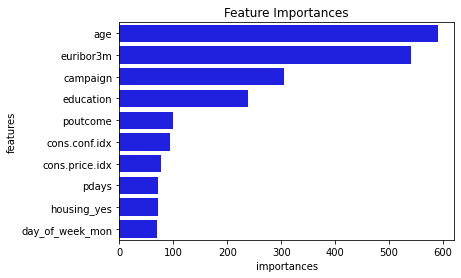

In [147]:
top10_features = feature_importances.sort_values('importances', ascending=False).head(10)

sns.barplot(data = top10_features, y= 'features', x='importances', ci=0, color='blue')
plt.title('Feature Importances')


plt.show()

Top 3 fitur paling penting berdasarkan model Light GBM kita, yaitu **age**, **euribor3m**, dan **campaign**. Hal ini cukup sesuai dengan EDA kita sebelumnya, yang mana ketiga fitur tersebut memang memiliki hubungan dengan target sebagai berikut:
- age : target cenderung yes di rentang usia 13-20 tahun atau di atas 60 tahun
- euribor3m : target cenderung yes jika euribor3m di bawah 2
- campaign : target cenderung yes jika nilai campaign kecil atau di bawah 10

In [184]:
df_proba = pd.DataFrame(pipe_lgbm[0].transform(X_test), columns=feature_name)
df_proba['probability'] = y_proba

In [185]:
df_proba = df_proba.round({'probability': 4})

df_proba

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,probability
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,32.0,5.0,999.0,0.0,1.4,93.444,-36.1,4.964,5228.1,0.3332
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,2.0,999.0,0.0,1.4,94.465,-41.8,4.864,5228.1,0.5466
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,51.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.856,5191.0,0.2370
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.266,5099.1,0.5016
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,3.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,0.6413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,1.0,999.0,0.0,1.4,93.444,-36.1,4.968,5228.1,0.5184
10290,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,2.0,999.0,0.0,-1.8,92.893,-46.2,1.334,5099.1,0.6223
10291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,24.0,1.0,999.0,0.0,-1.8,92.893,-46.2,1.291,5099.1,0.4166
10292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,3.0,999.0,1.0,-1.8,92.893,-46.2,1.250,5099.1,0.8245


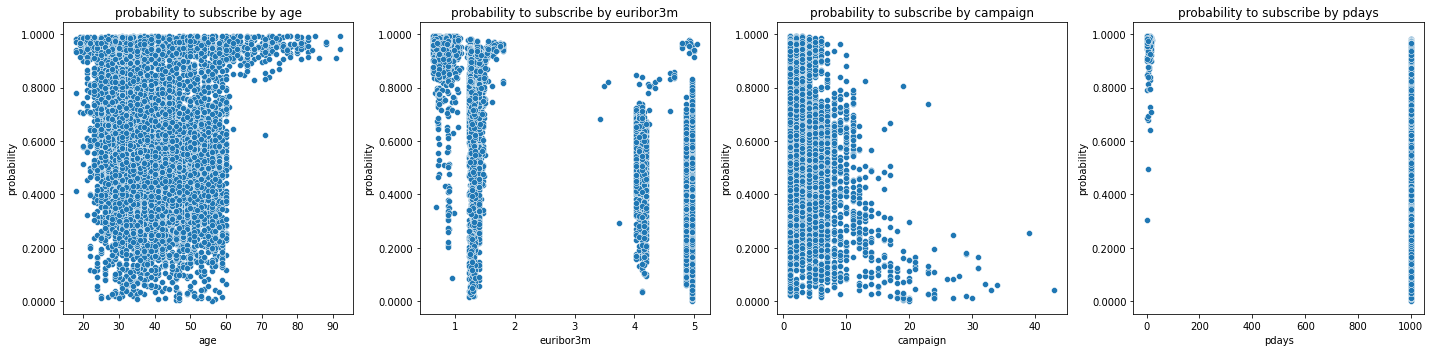

In [186]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(1, 4, figsize=(20, 5)) 
for i, j in zip(['age', 'euribor3m', 'campaign', 'pdays'], axes.flatten()):
    ax = sns.scatterplot(data=df_proba, x=i, y= 'probability', ax= j)
    ax.set_title(f'probability to subscribe by {i}',size = 12) 
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.tight_layout()

plt.show()

Dari scatterplot di atas terlihat bahwa:

- age : probability untuk deposit cenderung di atas 80% pada rentang usia di bawah 20 tahun atau di atas 60 tahun
- euribor3m : probability untuk deposit cenderung di atas 80% jika euribor3m di bawah 2
- campaign : pada nilai campaign di bawah 10 masih terdapat probability untuk deposit di atas 80%, sedangkan ketika jumlah campaign sudah lebih dari 10  probability untuk deposit cenderung semakin turun
- pdays : probability untuk deposit cenderung di atas 60% pada nasabah yang waktu kontak terakhir dari program sebelumnya tidak melebihi 30 hari 

In [187]:
df_proba["education"] = df_proba["education"].map({1: 'illiterate', 2: 'basic.4y', 
                                 3: 'basic.6y', 4: 'basic.9y', 5: 'high.school',
                                 6: 'professional.course', 7:'university.degree'})

df_proba["poutcome"] = df_proba["poutcome"].map({0: 'nonexistent', 1: 'failure', 
                                 2: 'success'})

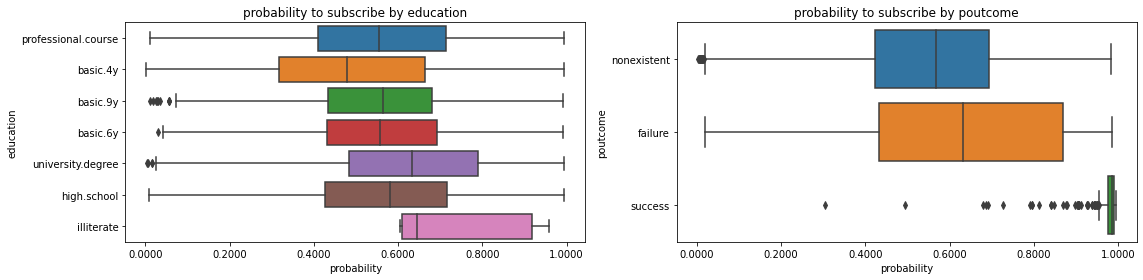

In [192]:
from matplotlib.ticker import FormatStrFormatter

fig, axes = plt.subplots(1, 2, figsize=(16, 4)) 
for i, j in zip(['education', 'poutcome'], axes.flatten()):
    ax = sns.boxplot(data=df_proba, y=i, x= 'probability', ax= j)
    ax.set_title(f'probability to subscribe by {i}',size = 12) 
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.tight_layout()

plt.show()

Dari boxplot di atas terlihat bahwa:

- education : probability untuk deposit cenderung di atas 60% pada tingkat pendidikan illiterate (1)
- poutcome : probability untuk deposit cenderung di atas 80% untuk nasabah yang 'success' (2) pada program sebelumnya

### SHAPLEY VALUE OF EXPLANATIONS (SHAP)

In [154]:
X_train_prep = transformer.fit_transform(X_train)

c:\Users\mzulfikarmuslim\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


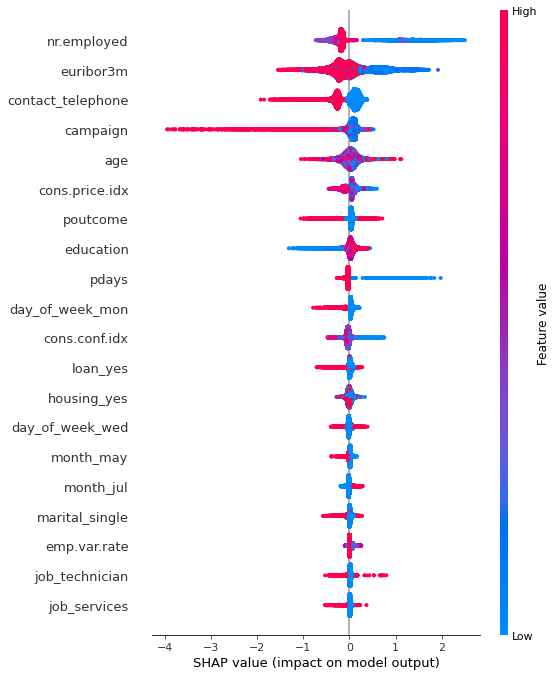

In [155]:
import shap

explainer = shap.TreeExplainer(pipe_lgbm['algo'])
shap_values = explainer.shap_values(X_train_prep)

shap.summary_plot(shap_values[1], X_train_prep, feature_names = feature_name)

Berdasarkan SHAP value, kita dapat melihat bahwa fitur yang paling penting diantaranya:
- `euribor3m`
- `nr.employed`
- `contact_telephone`
- `campaign`

**Interpretasi**
- Semakin rendah `euribor3m` (warna biru), semakin besar kemungkinan nasabah untuk deposito.
- Pada saat jumlah pegawai (`nr.employed`) di Bank tersebut rendah (warna biru), nasabah cenderung memiliki kemungkinan deposito yang lebih tinggi. 
- Nasabah yang dikontak melalui telepon `contact_telephone` (warna merah = yes), cenderung rendah kemungkinannya untuk deposito.
- Nasabah dengan jumlah `campaign` yang tinggi (warna merah), cenderung memiliki kemungkinan deposito yang lebih rendah dibandingkan dengan nasabah dengan jumlah yang rendah.

Hasil ini cukup konsisten dengan hasil analisa pada bagian EDA.

### LOCAL INTERPRETABLE MODEL-AGNOSTIC EXPLANATION (LIME)


In [156]:
import lime
from lime import lime_tabular

# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_prep),
    feature_names=feature_name,
    class_names=['no', 'yes'],
    mode='classification'
)

In [157]:
X_test_df = pd.DataFrame(pipe_lgbm[0].transform(X_test), columns=feature_name)

The prediction must predict this passenger is: no from y_test


''

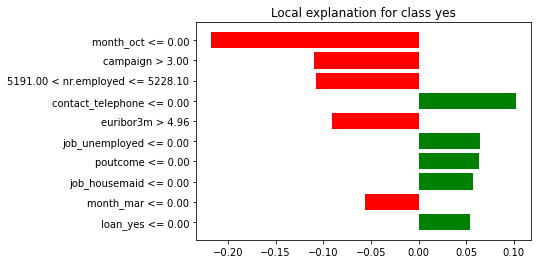

In [158]:
print(f"The prediction must predict this passenger is: {('yes' if y_test.iloc[0] == 1 else 'no')} from y_test")

exp = explainer.explain_instance(X_test_df.iloc[0], 
                                 pipe_lgbm['algo'].predict_proba, 
                                 num_features=10)
exp.as_pyplot_figure()
;

**Interpretasi**

- Pada nasabah dengan index 0, terakhir kontak bukan pada bulan Oktober (`month_october` <=0) cenderung mendorong nasabah tersebut untuk Tidak Deposit.
- Jumlah `campaign` > 3 juga dapat menjadi faktor yang mendorong untuk Tidak Deposit.
- Kontak secara seluler (contact_telephone <= 0.00) menjadi faktor yang mendorong kemungkinan pelanggan ini (index 0) untuk Deposit

### Final Model


In [159]:
final_model = pipe_lgbm
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['education',
                                                                       'poutcome'],
                                                                 mapping=[{'col': 'education',
                                                                           'mapping': {None: 0,
                                                                                       'basic.4y': 2,
                                                                                       'basic.6y': 3,
                                                                                       'basic.9y': 4,
                                                                                       'high.school': 5,
                                                                                       'illiterate': 1,
                                                                                       'professional.course': 6,
                                                                                       'university.degree': 7}},
                                                                          {'col': 'poutcome',
                                                                           'mapping': {None: 0,
                                                                                       'failure': 1,
                                                                                       'nonexistent': 0,
                                                                                       'success': 2}}]),
                                                  ['education', 'poutcome'])])),
                ('algo', LGBMClassifier(scale_pos_weight=30))])

In [160]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.39      0.56      9134
           1       0.16      0.89      0.27      1160

    accuracy                           0.45     10294
   macro avg       0.56      0.64      0.41     10294
weighted avg       0.87      0.45      0.52     10294



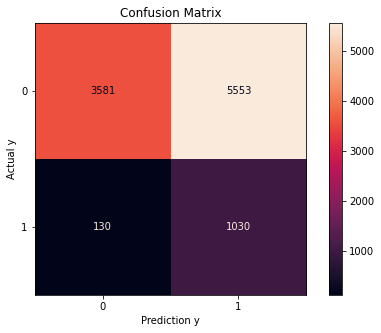

In [161]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, cmap='rocket', ax=ax)

plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix')

plt.show()

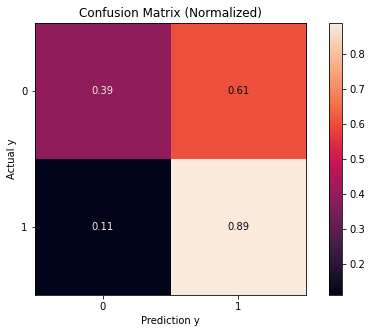

In [162]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, normalize='true', cmap='rocket', ax=ax)

plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix (Normalized)')

plt.show()

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model LightGBM yang telah kita buat didapati:
- Jumlah nasabah yang aktualnya deposit dan diprediksi akan deposit (True Positive) : 1030 orang
- Jumlah nasabah yang aktualnya deposit tetapi diprediksi tidak akan deposit (False Negative) : 130 orang
- Jumlah nasabah yang aktualnya tidak deposit dan diprediksi tidak akan deposit (True Negative) : 3581 orang
- Jumlah nasabah yang aktualnya tidak deposit tetapi diprediksi akan deposit (False Positive) : 5553 orang
- False Positive Rate (aktualnya tidak deposit, diprediksi deposit) = 61%
- False Negative Rate (aktualnya deposit, diprediksi tidak deposit) = 11%

---

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi nasabah yang akan Deposit atau tidak. Dampaknya adalah kita cenderung untuk menawarkan produk dan menelepon seluruh nasabah.

Jumlah Nasabah untuk dasar perhitungan :
- Nasabah yang ditelepon adalah seluruh nasabah = 10294 orang
- Nasabah yang aktualnya deposit = 1160 orang

Profit Estimation
- Pendapatan - Biaya
- = (Jumlah nasabah yang Deposit x Pendapatan deposit) - ( Jumlah nasabah yang di telepon x Biaya telemarketing) 
- = (1160 x 31.75 Euro) - (10294 x 1.44 Euro) = 36830 - 14823,36 = 22006,64 Euro

Maka keuntungannya sekitar **22006,64 Euro**

---
Saat kita menggunakan machine learning, kita hanya menawarkan produk dan menelepon nasabah yang diprediksi akan deposit saja.

Jumlah Nasabah untuk dasar perhitungan :
- Nasabah yang ditelepon adalah nasabah yang diprediksi deposit = TP + FP = 1030 + 5553 = 6583 orang
- Nasabah yang aktualnya deposit = TP = 1030 orang

Profit Estimation
- Pendapatan - Biaya
- = (Jumlah nasabah yang Deposit x Pendapatan deposit) - ( Jumlah nasabah yang di telepon x Biaya telemarketing) 
- = (1030 x 31.75 Euro) - (6583 x 1.44 Euro) = 32702,5 - 9479,52 = 23222,98 Euro

Maka keuntungannya sekitar **23222,98 Euro**

---
Peningkatan Profit = 23222,98 - 22006,64 = 1216,34

**% Kenaikan** = 1216,3 / 22006,6 x 100 = **5,5%**

Berdasarkan test set, model kita dapat meningkatkan keuntungan dari deposito hingga **5,5%** sambil tetap mempertahankan kenyamanan nasabah.



#### Model Limitation

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `age` antara 19 sampai dengan 98 tahun
* `campaign` antara 1 sampai dengan 56 kali.
* `previous` antara 0 sampai dengan 7 kali.
* `euribor3m` antara 0.634 - 5.045 %.
* `nr.employed` antara 4963 - 5228

## 6. Conclusion and Recommendation 

### Conclusion

**Karakteristik nasabah yang tertarik dengan deposito:**
- Nasabah yang tertarik dengan deposito cenderung memiliki pekerjaan **student** dalam usia sekolah (**teenage**) dan baru menamatkan jenjang Pendidikan **basic.6y**.
- Nasabah juga cenderung tertarik dengan deposito jika sudah pensiun (**retired**) dan masuk dalam kategori usia **senior** (60 tahun ke atas).
- Nasabah yang bukan student maupun retired cenderung melakukan deposito jika tingkat pendidikan **university.degree** atau berada dalam kategori usia **senior**
- Nasabah yang dikontak menggunakan **cellular** memiliki kecenderungan deposito 2.83x lebih tinggi dibandingkan menggunakan telephone dan waktu durasi telepon yang lebih cepat.
- Waktu terbaik untuk menghubungi nasabah adalah di pertengahan minggu (**Selasa - Kamis**) dan ketika **euribor 3-month rate sedang turun atau di bawah 2**
- Nasabah yang sebelumnya sudah pernah melakukan deposito (**success**) memiliki kecenderungan untuk deposito 4-7x lebih tinggi dibandingkan failure atau nonexistent.
- Jumlah kontak yang optimal kepada nasabah **minimal sebanyak 3x** karena dapat meningkatkan persentase subscribe 3,12x dibandingkan hanya dikontak 1x, namun jumlah kontak sebaiknya **tidak lebih dari 10x**.

<br>

**Karakteristik model machine learning yang didapat:**
- Metric utama yang kita gunakan adalah **recall**, karena meminimalkan False Negative kita anggap lebih penting dibandingkan False Positive.
- Model terbaik yang kita gunakan adalah model **Light GBM** benchmark dengan **scale_pos_weight=30**.
- Berdasarkan model Light GBM, fitur/kolom yang paling berpengaruh terhadap target (Deposit) adalah `age`, `euribor3m` dan `campaign`.
- Interpretasi SHAP untuk model LightGBM :
    - Semakin rendah `euribor3m` (warna biru), semakin besar kemungkinan nasabah untuk deposito.
    - Pada saat jumlah pegawai (`nr.employed`) di Bank tersebut rendah (warna biru), nasabah cenderung memiliki kemungkinan deposito yang lebih tinggi. 
    - Nasabah yang dikontak melalui telepon `contact_telephone` (warna merah = yes), cenderung rendah kemungkinannya untuk deposito.
    - Nasabah dengan jumlah `campaign` yang tinggi (warna merah), cenderung memiliki kemungkinan deposito yang lebih rendah dibandingkan dengan nasabah dengan jumlah yang rendah.
    <br>
    <br>
- **Precision** = 0.16 yang berarti dari total pelanggan yang diklasifikasikan deposit, hanya **16%**-nya yang berhasil terprediksi dengan benar.
- **Recall** =  0.89 yang berarti dari total nasabah yang aslinya deposit, **89%**-nya berhasil diprediksi dengan benar.
- **False Positive Rate** (aktualnya tidak deposit, diprediksi deposit) = **61%**
- **False Negative Rate** (aktualnya deposit, diprediksi tidak deposit) = **11%**
- Penerapan model machine learning dapat meningkatkan profit sebesar **5,5%**

### Recommendation

Beberapa langkah aksi yang dapat dilakukan perusahaan untuk meningkatkan jumlah nasabah yang akan deposito di antaranya :
- Lebih memfokuskan upaya marketing kita kepada kategori pekerjaan **student** dan **retired** karena memiliki persentase subscribe 2-4x lebih besar dibandingkan pekerjaan lain.
- Memfokuskan upaya kepada nasabah student yang masih berada dalam usia sekolah (**teenage**) atau menawarkan produk-produk khusus pelajar terutama yang baru menamatkan jenjang Pendidikan **basic.6y** atau setara Sekolah Dasar.
- Mencoba melakukan pendekatan kepada nasabah yang sudah pensiun dan masuk dalam kategori usia **senior** (60 tahun ke atas) karena memiliki kemungkinan deposito yang jauh lebih tinggi.
- Untuk nasabah dengan pekerjaan selain student dan retired, tim marketing dapat menargetkan program deposito pada nasabah dengan tingkat pendidikan **university.degree** atau nasabah yang berada dalam kategori usia **senior**.
- Melakukan kontak melalui **cellular** saja karena dapat meningkatkan kemungkinan deposito serta meningkatkan produktivitas (rata-rata durasi yang lebih cepat). Selain itu ketika ada nasabah yang baru mendaftar agar dipastikan untuk mencantumkan nomor cellullar.
- Meningkatkan upaya marketing di pertengahan minggu (**Selasa-Kamis**) karena memiliki kemungkinan subscribe lebih tinggi dibandingkan Senin atau Jumat.
- Melakukan kontak kepada nasabah ketika **euribor 3-month rate sedang turun atau di bawah 2**.
- Mengutamakan kelompok nasabah yang sebelumnya sudah pernah melakukan deposito (**success**) untuk ditawarkan deposito.
- Melakukan kontak kepada nasabah minimal sebanyak **3x** karena dapat meningkatkan persentase subscribe namun tidak lebih dari 10x

<br>

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi diantaranya:
- Menambahkan jumlah data terutama pada kategori job student dan retired untuk memperoleh informasi yang lebih akurat.
- Menambahkan fitur-fitur atau kolom baru seperti tingkat bunga deposito yang ditawarkan, penghasilan per bulan, jumlah saldo di bank, atau jumlah hutang nasabah yang kemungkinan berpengaruh terhadap kecenderungan nasabah untuk melakukan deposito atau tidak.
- Melakukan penambahan data khususnya untuk kelas minoritas (Deposito) agar dapat membantu meningkatkan performa model.
- Mencoba algorithm ML yang berbeda (misal algoritma Logistic Regression, CatBoost, etc) 
- Menganalisa data-data yang model yang masih salah tebak (False Negative dan terutama False Positive) untuk mengetahui alasan dan karakteristiknya.

## Model Deployment

#### *SAVE FINAL MODEL*

In [163]:
import pickle

In [164]:
# fit
final_model.fit(X, y)

# save with pickle
pickle.dump(final_model, open('deposit_subscription_model_lgbm.sav', 'wb'))

#### *LOAD FINAL MODEL*

In [165]:
loaded_model = pickle.load(open('deposit_subscription_model_lgbm.sav', "rb"))

#### *PREDICT MODEL*

In [166]:
df_test_num1 = pd.DataFrame({
    'age' : [65], 
    'job' : ['retired'], 
    'marital' : ['married'], 
    'education' : ['university'], 
    'housing' : ['no'], 
    'loan' : ['no'], 
    'contact' : ['telephone'],
    'month' : ['mar'], 
    'day_of_week' : ['wed'], 
    'campaign' : [5], 
    'pdays' : [999], 
    'previous' : [0], 
    'poutcome' : ['nonexistent'],
    'emp.var.rate' : [1.1], 
    'cons.price.idx' : [93.749], 
    'cons.conf.idx' : [-41.8], 
    'euribor3m' : [4.857],
    'nr.employed' : [5191]
    })

# print sample data
display(df_test_num1)

# predict that data
print("predict proba :",loaded_model.predict_proba(df_test_num1))
print("predict class :",loaded_model.predict(df_test_num1))

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,65,retired,married,university,no,no,telephone,mar,wed,5,999,0,nonexistent,1.1,93.749,-41.8,4.857,5191


predict proba : [[0.22512705 0.77487295]]
predict class : [1]


Berdasarkan data dummy tersebut, terdapat 77% peluang bahwa nasabah ini memesan deposito.

In [167]:
df_test_num2 = pd.DataFrame({
    'age' : [35], 
    'job' : ['admin.'], 
    'marital' : ['married'], 
    'education' : ['basic.9y'], 
    'housing' : ['no'], 
    'loan' : ['no'], 
    'contact' : ['cellular'],
    'month' : ['may'], 
    'day_of_week' : ['mon'], 
    'campaign' : [15], 
    'pdays' : [20], 
    'previous' : [2], 
    'poutcome' : ['failure'],
    'emp.var.rate' : [1.1], 
    'cons.price.idx' : [93.749], 
    'cons.conf.idx' : [-41.8], 
    'euribor3m' : [4.857],
    'nr.employed' : [5191]
    })

# print sample data
display(df_test_num2)

# predict that data
print("predict proba :",loaded_model.predict_proba(df_test_num2))
print("predict class :",loaded_model.predict(df_test_num2))

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,35,admin.,married,basic.9y,no,no,cellular,may,mon,15,20,2,failure,1.1,93.749,-41.8,4.857,5191


predict proba : [[0.94094223 0.05905777]]
predict class : [0]


Berdasarkan data dummy tersebut, terdapat 94% peluang bahwa nasabah ini tidak memesan deposito.